In [1]:
import os
import sys

pysur_path ="/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/"
sys.path.append(pysur_path)

In [2]:
y_values1=np.linspace(3/20,8/20,6)
y_values2=np.linspace(10/20,1,14)
y_values= np.hstack((y_values1, y_values2))
data_matrix=[]
for y in y_values:
    a=generate_Ft.main(y)
    print(a[0])
    print(a[1])
    
    data_matrix.append(a[0])
    
    data_matrix.append(a[1])
    print(data_matrix[0])
    print(data_matrix[1])



NameError: name 'np' is not defined

In [2]:

import numpy as np
import numpy as np
import pySurrogate as pySur
import random
from matplotlib import pyplot as plt
%matplotlib inline

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
for i in range(20):
    print(len(data_matrix[2*i+1]))

887
886
886
886
886
886
886
886
886
886
887
887
886
886
886
886
886
887
886
886


In [ ]:
longer_y_space=[]
longer_data_matrix=[]
for i in range(20):
    if len(data_matrix[2*i+1])<887:
        longer_data_matrix.append(data_matrix[2*i+1])
        longer_y_space.append(y_values[i])
    else:
        data_matrix[2*i+1]=data_matrix[2*i+1][:-1]
        longer_data_matrix.append(data_matrix[2*i+1])   
        longer_y_space.append(y_values[i])


In [ ]:
for i in range(len(y_values)):
 print(np.shape(data_matrix[2*i+1])) 

(886,)
(886,)
(886,)
(886,)
(886,)
(886,)
(886,)
(886,)
(886,)
(886,)
(886,)
(886,)
(886,)
(886,)
(886,)
(886,)
(886,)
(886,)
(886,)
(886,)


In [ ]:
Ft_of_y=[]
for i in range(len(y_values)):
    Ft_of_y.append(data_matrix[2*i+1][7])
print(Ft_of_y)    

plt.figure(dpi=300)
plt.plot(y_values,Ft_of_y)
plt.xlabel("y")
plt.ylabel(r"$ F_t $")
plt.legend()

NameError: name 'y_values' is not defined

In [ ]:
np.random.seed(0)
random.seed(0)

# Setup the domain

times = data_matrix[0][:-1]

# Setup the training space


# Make a DataModeler object as our surrogate
sur = pySur.DataModeler(times, "Ft Surrogate")

# Add the data
for i in range(len(y_values)):
 sur.addKnownDataSet(np.array([y_values[i]]), data_matrix[2*i+1])
 
    
# Build a reduced basis and empirical interpolant
sur.createEmpiricalInterpolant(basisTol=1.e-2)

# Setup fits - these options will be remembered for all fits unless we override them
sur.setupFits(minVals=y_values[0], maxVals=y_values[19], absTol=1.e-2)

# Fit the data
sur.fit()

# That's it!  We can try evaluating the surrogate at the training points:
maxErr = 0.
for w in y_values:
    sur_eval = sur(np.array([w]))

# And of course we can evaluate the surrogate at other points too!
# Let's use the surrogate's test function to keep track of the errors for us:
sur_eval2=sur(np.array([0.8])) 

    

Creating a float64 pySur RB/EI from 20 data sets with tol 0.01 for Ft Surrogate
...got 20 basis elements
Ft Surrogate is fitting 20 nodes


In [ ]:
for i in range(len(y_values)):
 print(np.array([y_values[i]]))

[0.15]
[0.2]
[0.25]
[0.3]
[0.35]
[0.4]
[0.5]
[0.53846154]
[0.57692308]
[0.61538462]
[0.65384615]
[0.69230769]
[0.73076923]
[0.76923077]
[0.80769231]
[0.84615385]
[0.88461538]
[0.92307692]
[0.96153846]
[1.]


In [ ]:

actual_function=generate_Ft.main(0.8)
print(len(actual_function[1]))

886


886
886


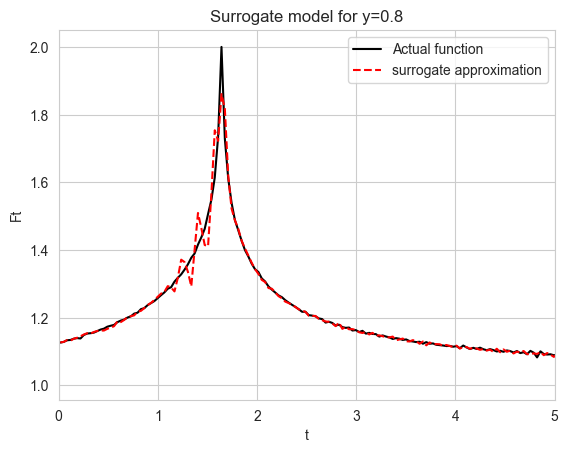

In [ ]:
time=actual_function[0]
print(len(time))
actual_function_to_approximate=actual_function[1]
print(len(actual_function_to_approximate))
plt.figure()
plt.plot(time,actual_function_to_approximate,label='Actual function',color='black')
plt.plot(time,sur_eval2,label='surrogate approximation',color='red', linestyle='dashed')
plt.xlim(0,5)
plt.xscale='log'
plt.title('Surrogate model for y=0.8')
plt.ylabel('Ft')
plt.xlabel('t')
plt.legend()

## RMS error

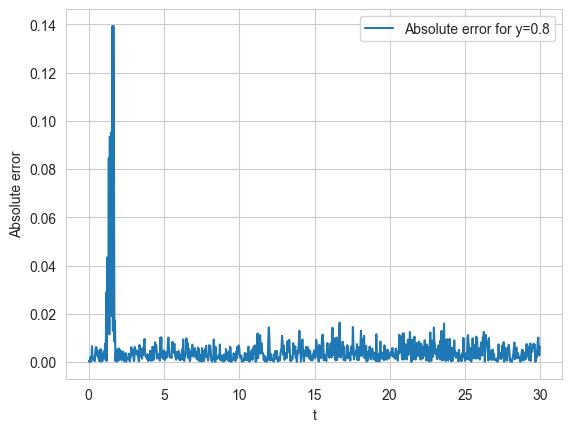

In [ ]:
abs_error=np.abs(sur_eval2-actual_function_to_approximate)
plt.figure()
plt.plot(time,abs_error,label='Absolute error for y=0.8')
plt.xlabel('t')
plt.ylabel('Absolute error')
plt.legend()

## Surrogate error

In [ ]:
#Generate data for validation space
y_validS_values1=np.linspace(3/20,8/20,60)
y_validS_values2=np.linspace(10/20,1,140)
validS_data_matrix=[]
for y in y_validS_values1:
    a1=generate_Ft.main(y)
    validS_data_matrix.append(a1[0])
    validS_data_matrix.append(a1[1])
for y in y_validS_values2:
    a2=generate_Ft.main(y)
    validS_data_matrix.append(a2[0])
    validS_data_matrix.append(a2[1])    

In [ ]:
validationSpace = np.hstack((y_validS_values1,y_validS_values2))
new_valid_space=[]
new_data_matrix=[]
for i in range(200):
    if len(validS_data_matrix[i])==886:
        new_data_matrix.append(validS_data_matrix[i])
    
        new_valid_space.append(validationSpace[i])



In [ ]:
print(np.shape(new_data_matrix))

(158, 886)


In [ ]:
sur.clearCheckedErrors()

[1.96610732 2.0216483  2.08376175 2.15779231 2.24323442 2.35987769
 2.51032224 2.74772562 3.28536808 3.64649278 2.73133056 2.41592425
 2.2295839  2.08693965 1.98488581 1.89395461 1.81912957 1.76691094
 1.71136996 1.66666272 1.6237611  1.59212658 1.55406404 1.5345633
 1.50393993 1.48133352 1.45908824 1.44160981 1.41864227 1.40795298
 1.390619   1.37068491 1.36664032 1.35067861 1.33645029 1.32698883
 1.31796071 1.30597137 1.30012115 1.29138193 1.28300384 1.27549244
 1.26595875 1.26155303 1.25281381 1.24869699 1.24443572 1.23952442
 1.22515166 1.2325186  1.22233489 1.21525684 1.21395679 1.20897327
 1.20593983 1.2021119  1.19871733 1.19221709 1.19127816 1.18788359
 1.18261117 1.18282784 1.18073332 1.17582203 1.1737275  1.16556608
 1.1711274  1.16506051 1.16339934 1.15661019 1.16491606 1.15863249
 1.15133777 1.15494902 1.1488099  1.14722095 1.14700427 1.14519865
 1.1450542  1.14151518 1.13891508 1.14137073 1.13263151 1.13956511
 1.13097034 1.13328154 1.13508716 1.12302559 1.12916471 1.13255

Max validation Full LInf error: 8331.926271891252
Max validation Full RMS error: 537.6158321276527
Max validation EI LInf error: 28.827383369529006
Max validation EI RMS error: 16.320848838602956
Max validation RB LInf error: 36.453073784641155
Max validation RB RMS error: 9.176868855313327


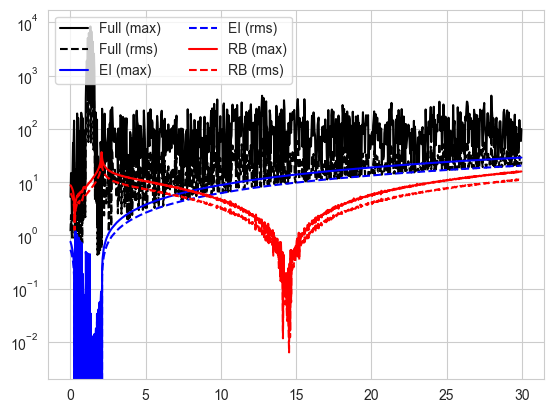

In [ ]:
# And of course we can evaluate the surrogate at other points too!
# Let's use the surrogate's test function to keep track of the errors for us:
validationSpace = new_valid_space

for i in range((158)):
    test_evals=sur.test(np.array([new_valid_space[i]]),new_data_matrix[i])

colors = {'Full': 'k', 'RB': 'r', 'EI': 'b'}
for errType, errDict in sur.testErrors.items():
    for k in ['LInf', 'RMS']:
        print('Max validation %s %s error: %s'%(errType, k, max(errDict[k])))
    plt.semilogy(times, errDict['maxErrVsDomain'], colors[errType], label='%s (max)'%errType)
    plt.semilogy(times, errDict['rmsErrVsDomain'], colors[errType] + '--', label='%s (rms)'%errType)
plt.legend(loc='upper left', ncol=2)
#plt.ylim((1.e-6, 1.))
plt.show()



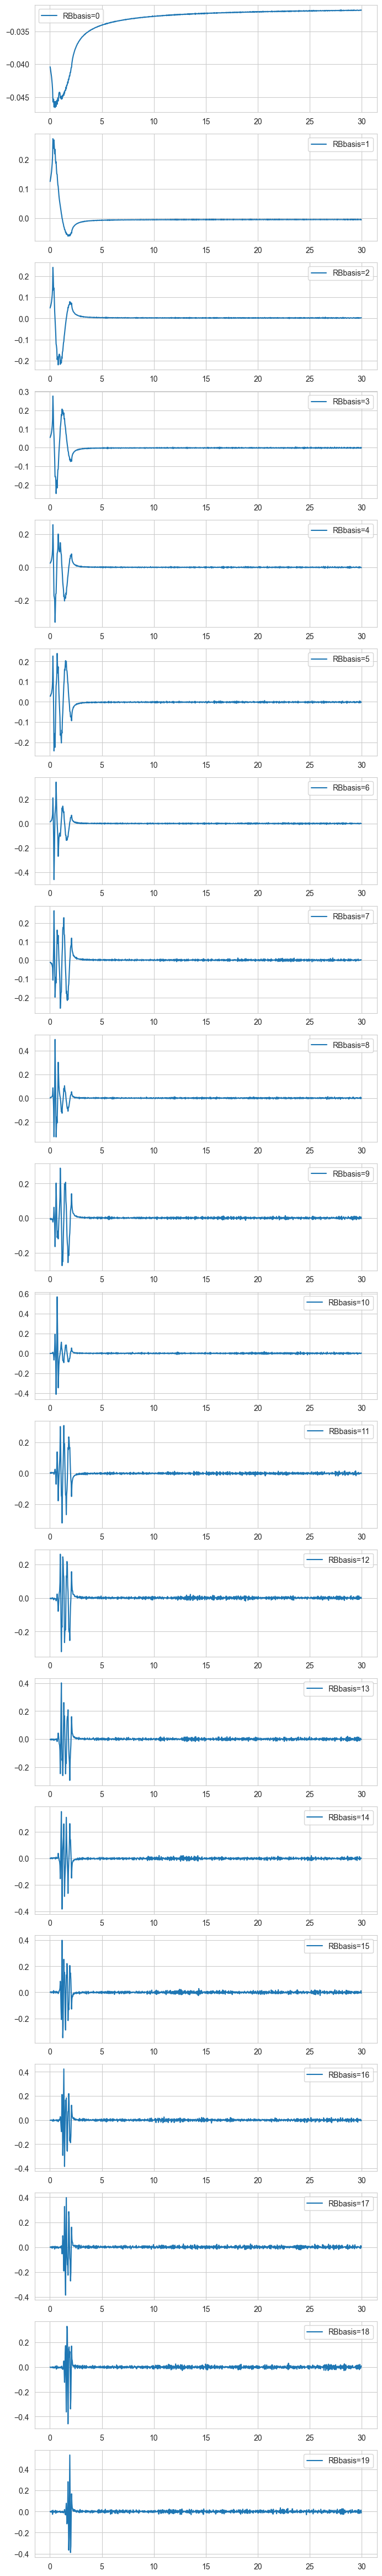

In [ ]:
sur.RB
sur.xVals
fig, axes = plt.subplots(nrows=len(sur.RB), figsize=(8,3*len(sur.RB)))
for idx, rb in enumerate(sur.RB):
    axes[idx].plot(times,rb,label=f'RBbasis={idx}')
    axes[idx].legend()


In [ ]:
print(len(new_valid_space))

158


In [ ]:
np.random.seed(0)
random.seed(0)

# Setup the domain

new_times = new_data_matrix[0]

# Setup the training space


# Make a DataModeler object as our surrogate
sur2 = pySur.DataModeler(new_times, "Ft Surrogate 2")

# Add the data
for i in range(158):  #Change this range based on the length of the new_data_matrix
 sur2.addKnownDataSet(np.array([new_valid_space[i]]), new_data_matrix[i])
 
    
# Build a reduced basis and empirical interpolant
sur2.createEmpiricalInterpolant(basisTol=1e-2)

# Setup fits - these options will be remembered for all fits unless we override them
sur2.setupFits(minVals=y_values[0], maxVals=y_values[19], absTol=1.e-2)

# Fit the data
sur2.fit()

# That's it!  We can try evaluating the surrogate at the training points:
maxErr = 0.
for w in new_valid_space:
    sur_eval = sur2(np.array([w]))

# And of course we can evaluate the surrogate at other points too!
# Let's use the surrogate's test function to keep track of the errors for us:
#new_sur_eval=sur2(np.array([0.88])) 

    

Creating a float64 pySur RB/EI from 158 data sets with tol 0.01 for Ft Surrogate 2
...got 26 basis elements
Ft Surrogate 2 is fitting 26 nodes


/Users/gopalprabhu/Desktop/Surrogate_project/Surrogate_py/notebooks/pySurrogate/fit_greedy.py:198: UserWarning: Ft Surrogate 2_node0_idx885: Adding coef 142 increased rms resids
  warnings.warn("{}: Adding coef {} increased rms resids".format(
/Users/gopalprabhu/Desktop/Surrogate_project/Surrogate_py/notebooks/pySurrogate/fit_greedy.py:198: UserWarning: Ft Surrogate 2_node1_idx12: Adding coef 142 increased rms resids
  warnings.warn("{}: Adding coef {} increased rms resids".format(
/Users/gopalprabhu/Desktop/Surrogate_project/Surrogate_py/notebooks/pySurrogate/fit_greedy.py:198: UserWarning: Ft Surrogate 2_node2_idx32: Adding coef 142 increased rms resids
  warnings.warn("{}: Adding coef {} increased rms resids".format(
/Users/gopalprabhu/Desktop/Surrogate_project/Surrogate_py/notebooks/pySurrogate/fit_greedy.py:198: UserWarning: Ft Surrogate 2_node3_idx18: Adding coef 142 increased rms resids
  warnings.warn("{}: Adding coef {} increased rms resids".format(
/Users/gopalprabhu/Desktop/

In [ ]:
new_sur_eval=sur2(np.array([0.24322033898305084])) 

new_actual_function=generate_Ft.main(0.24322033898305084)


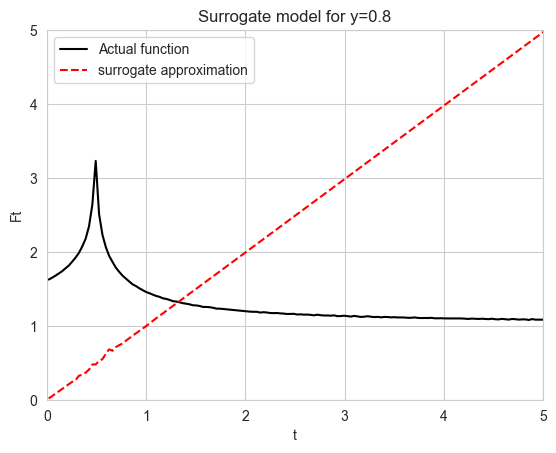

In [ ]:
new_time=new_actual_function[0]
actual_function_to_approximate=new_actual_function[1]
plt.figure()
plt.plot(time,actual_function_to_approximate,label='Actual function',color='black')
plt.plot(time,new_sur_eval,label='surrogate approximation',color='red', linestyle='dashed')
plt.xlim(0,5)
plt.ylim(0,5)
plt.xscale='log'
plt.title('Surrogate model for y=0.8')
plt.ylabel('Ft')
plt.xlabel('t')
plt.legend()

In [ ]:
surrogate_directory = "surrogate_lens_amp/"


.
.
.
.
.
.
.
.
.
.
.
.

....................................................................
.
.
..................................................................................................................................................
# Surrogate model comparison

In [3]:
import numpy as np
from joblib import Parallel, delayed
import matplotlib 
import matplotlib.pyplot as plt 
%matplotlib inline
import lal
#import pySurrogate as pysur
from tqdm import tqdm

import pickle
import warnings
from multiprocessing import freeze_support
warnings.filterwarnings("always")
from generate_Ft import Ftilde, PointLens
import pySurrogate as pySur
import time
import logging

In [4]:
times = np.arange(0.0, 30, 1 / 4096)


In [5]:
new_extended_times=np.arange(0.1,30.0+4.3994140625,1/2048)

In [5]:
lens_params = {
                "Ml": 100.0,
                "zl": 0.5,
            }

In [6]:
zl=0.5
Ml=100.0

In [7]:
ts = 8 * np.pi * lal.MTSUN_SI * Ml * (1 + zl)

In [8]:
y_min = 0.05
y_max = 1.0    #This was changed from 2 to 1
param_boundaries = [[y_min, y_max]]
times = np.arange(0.0, 5, 1 / 2048)           


def Ft(y, times, Ml=100, zl=0.5, dt_fac=30.0):
    point_lens = PointLens(y)
    ts = 8 * np.pi * lal.MTSUN_SI * Ml * (1 + zl)
    f_min, f_max = 10.0, 1000.0
    t_max = 30           # This was changed from 5 to 30 
    wmin = ts * f_min
    wmax = ts * f_max
    dt = min(np.pi / wmax / dt_fac, point_lens.img_td / dt_fac)  ##HAD NOTICED REDUCED ERRORS WITH INCREASED dt
    compute_Ft_params = {
        "lens": point_lens,
        "t_max": t_max,
        "dt": dt,
        "verbose": False,
    }
    t, Ft = Ftilde(**compute_Ft_params)
    FtNew = np.interp(times, t, Ft)
    #logging.debug("Ft calculated to be ", {Ft} )
    return FtNew

In [ ]:
def Ft_cut(y,cut_time, times, Ml, zl, dt_fac):
    cut_index=np.argmin(np.abs(times-cut_time))
    Ft_full=Ft(y, times, Ml, zl, dt_fac=dt_fac)
    Ft_cut=Ft_full[cut_index:-1]
    times_cut=times[cut_index:-1]
    return [times_cut, Ft_cut]

times_cut=Ft_cut(0.2,10,times,100,0.5,10)[0]

In [9]:
def Ft_shifted(y, times, Ml=100.0, zl=0.5,t_ref=2.08154296875, dt_fac=5.0):
    print("Ft shifted function called with y =",y)
    point_lens = PointLens(y)
    #print(lal.MTSUN_SI,"<--M_sun", Ml,"<--ML",zl,"<--zl")
    ts = 8 * np.pi * lal.MTSUN_SI * 100.0 * (1 + 0.5)
    f_min, f_max = 10.0, 1000.0
    t_max = 30
    wmin = ts * f_min
    wmax = ts * f_max
    dt = min(np.pi / wmax / dt_fac, point_lens.img_td / dt_fac)  ##HAD NOTICED REDUCED ERRORS WITH INCREASED dt
    compute_Ft_params = {
        "lens": point_lens,
        "t_max": t_max,
        "dt": dt,
        "verbose": False,
    }
    t, Ft = Ftilde(**compute_Ft_params)
    
    FtNew=np.interp(times, t, Ft)
    peak_index=np.argmax(FtNew)
    t_peak=times[peak_index]                                                      #Find the peak time
    t_shift=np.abs(t_ref-t_peak)                                                    #Fine how much to shift the time to align the peak with t_ref
    print("t_shift is:",t_shift)
        
    
    
    Ft_extended=[]
    for time in new_extended_times:
        if time<t_shift:
            Ft_extended.extend([0])
        elif time>30.0+t_shift:
            Ft_extended.extend([0])

        else:
            Ft_extended.extend([FtNew[np.argmin(np.abs(times-(time -t_shift)))]])    
            #print("This is the result of the Ft_extended function:", Ft_extended)
    print("Ft extended was calculated and returned")        
    return Ft_extended

# Defining the two surrogate model directory paths

















































In [68]:
extended_times=np.arange(0.1,30.0+extended_time_value,1/2048)

In [10]:
times_left=np.arange(0.0, 3.5, 1 / 2048)  

In [109]:
print(len((extended_times)))

68300


In [11]:
# Specify the directory where the surrogate model has been saved
surrogate_directory1 = "/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/SURR_dir_FINAL_3/"


# Create an instance of the DataModeler class
sur_model = pySur.DataModeler(times, "LensAmplification")

# Load the surrogate model from the specified directory
sur_model.load(surrogate_directory1)



# Specify the directory where the surrogate model has been saved
surrogate_directory2 = "/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Shift_surr_dir_final_3"


# Create an instance of the DataModeler class
shifted_sur_model = pySur.DataModeler(extended_times, "LensAmplification")

# Load the surrogate model from the specified directory
shifted_sur_model.load(surrogate_directory2)






FileNotFoundError: [Errno 2] No such file or directory: '/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/SURR_dir_FINAL_3//info.txt'

In [12]:

# Specify the directory where the surrogate model has been saved
surrogate_directory3 = "/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Truncated_surr_dir_1"


# Create an instance of the DataModeler class
truncated_sur_model = pySur.DataModeler(times_left , "LensAmplification")

# Load the surrogate model from the specified directory
truncated_sur_model.load(surrogate_directory3)


NameError: name 'times_left' is not defined

In [12]:

# Specify the directory where the surrogate model has been saved
surrogate_directory4 = "/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Truncated_surr_dir_2"


# Create an instance of the DataModeler class
truncated_sur_model2 = pySur.DataModeler(times_left , "LensAmplification")

# Load the surrogate model from the specified directory
truncated_sur_model2.load(surrogate_directory4)

NameError: name 'times_left' is not defined

In [13]:
ymin=0.1
ymax=1.0

In [14]:
def t_reference_calculator():
    Ft_ymax=Ft(ymax,times,Ml=100,zl=0.5,dt_fac=5.0)
    max_index=np.argmax(Ft_ymax)
    return times[max_index]

t_reference=t_reference_calculator()
print(t_reference)

def extended_time():
    Ft_ymin=Ft(ymin,times,100,0.5)
    Ft_min_peak_index=np.argmax(Ft_ymin)
    t_ymin_peak=Ft_ymin[Ft_min_peak_index]
    extended_time_value=np.abs(t_reference-t_ymin_peak)
    return extended_time_value

extended_time_value=extended_time()

extended_times=np.arange(0.1,30.0+extended_time_value,1/2048)

2.08203125


In [15]:
# Ft_shifted_2 has an automatic tref finder instead of manually entering it 

def Ft_shifted_2(y, times,t_ref=t_reference, Ml=100.0, zl=0.5, dt_fac=5.0):   #t_ref=4.58544921875
    print("Ft shifted function called with y =",y)
    point_lens = PointLens(y)
    #print(lal.MTSUN_SI,"<--M_sun", Ml,"<--ML",zl,"<--zl")
    ts = 8 * np.pi * lal.MTSUN_SI * 100.0 * (1 + 0.5)
    f_min, f_max = 10.0, 1000.0
    t_max = 30
    wmin = ts * f_min
    wmax = ts * f_max
    dt = min(np.pi / wmax / dt_fac, point_lens.img_td / dt_fac)  ##HAD NOTICED REDUCED ERRORS WITH INCREASED dt
    compute_Ft_params = {
        "lens": point_lens,
        "t_max": t_max,
        "dt": dt,
        "verbose": False,
    }
    t, Ft = Ftilde(**compute_Ft_params)
    
    FtNew=np.interp(times, t, Ft)
    peak_index=np.argmax(FtNew)
    t_peak=times[peak_index]                                                      #Find the peak time
    t_shift=np.abs(t_ref-t_peak)                                                    #Fine how much to shift the time to align the peak with t_ref
    print("t_shift is:",t_shift)
        
    
    
    Ft_extended=[]
    for time in extended_times:
        if time<t_shift:
            Ft_extended.extend([0])
        elif time>30.0+t_shift:
            Ft_extended.extend([0])

        else:
            Ft_extended.extend([FtNew[np.argmin(np.abs(times-np.abs((time -t_shift))))]])    
            #print("This is the result of the Ft_extended function:", Ft_extended)
    #result_list = '[' + ' '.join(map(str, Ft_extended)) + ']'
    print("Ft extended was calculated and returned")        
    return Ft_extended

# Checking the generate_SurfaceParams function

In [13]:


y_min = 0.05
y_max = 1.0    #This was changed from 2 to 1
param_boundaries = [[y_min, y_max]]

In [ ]:

def RandomBulkParams(params_boundaries):
    """Generate a random point in Volume"""
    lower_lims = np.array(params_boundaries).T[0]
    upper_lims = np.array(params_boundaries).T[1]
    # NOTE: np.random.uniform is left inclusive and right exclusive,
    # but that's ok here
    return [
        np.random.uniform(low=lower_lims[i], high=upper_lims[i], size=1)[0]
        for i in range(len(lower_lims))
    ]


In [ ]:
input=[[0,1],[1.1,2],[2.3,2.6]]
def RandomSurfaceParams(input):
    """Generate a random point on the surface.
    input should be of form:
    [[minVal1, maxVal1],[minVal2, maxVal2],...]
    """
    # NOTE: np.random.randint is left inclusive and right exclusive
    # Choose which param to keep const on the surface
    
    which_param_surface = np.random.randint(low=0, high=len(input), size=1)
    print("which param surface=", which_param_surface)
    
    # Choose which end of that param
    which_surface_side = np.random.randint(low=0, high=2, size=1)[0]
    print("which surface side=",which_surface_side)
    
    surface_params_boundaries = np.delete(
        np.array(input), which_param_surface, axis=0
    )
    print("Surface params boundaries=",surface_params_boundaries)
    
    # Get params for the non-excluded dims using a Bulk param generator
    surface_params = np.array(RandomBulkParams(surface_params_boundaries))
    print("surface params=", surface_params)
    
    const_param = input[which_param_surface[0]][which_surface_side]
    print("const_param=",const_param)

    return_variable= np.insert(surface_params, which_param_surface[0], [const_param], axis=0)
    print("Surface_params=",return_variable)
    
    return return_variable


In [ ]:
print(RandomSurfaceParams(input))

which param surface= [1]
which surface side= 0
Surface params boundaries= [[0.  1. ]
 [2.3 2.6]]
surface params= [0.27926667 2.5059592 ]
const_param= 1.1
Surface_params= [0.27926667 1.1        2.5059592 ]
[0.27926667 1.1        2.5059592 ]


In [ ]:
TS=[[0.2],[1.5]]

In [ ]:

def GenerateRandomParms(size, surface_prob, training_set, params_boundaries):
    """Generate *size* number of random parameters withing the parameter
    ranges.
        Generates points on the surface with probability surface_prob.
        Adds only those parameters not already in the training set.
        params_boundaries should be of form:
    [[minVal1, maxVal1],[minVal2, maxVal2],...]
    """

    if surface_prob < 0 or surface_prob > 1:
        print("ERROR: Invalid probability.")
        exit(-1)

    # We could Start by including all corner points, but we assume those are in
    # the training_set already
    params_list = []
    while len(params_list) < size:
        PickOnSurface = np.random.choice(
            [0, 1], size=1, p=[1 - surface_prob, surface_prob]
        )[0]
        print("pick_on_surface=",PickOnSurface)
        if PickOnSurface:
            new_params = RandomSurfaceParams(params_boundaries)
            print("new_params=",new_params)
        else:
            new_params = RandomBulkParams(params_boundaries)
            print("new_params=",new_params)

        # Add new_params only if it is not already in the training set
        # This is mainly an issue in 1D (for the boundary cases)

        training_list_of_tuples = set([tuple(i) for i in training_set])
        if tuple(new_params) not in training_list_of_tuples:
            params_list.append(new_params)
            print("params_list=",params_list)

        # remove duplicate element
        params_list_of_tuples = [tuple(i) for i in params_list]
        uniqe_param_list_of_tuples = list(set(params_list_of_tuples))
        params_list = [list(i) for i in uniqe_param_list_of_tuples]
        print("unique params list of tuples=",params_list)
        print()
        print()
        print()

    return np.array(params_list)


In [ ]:
GenerateRandomParms(10,0.9,TS,param_boundaries)

pick_on_surface= 1
which param surface= [0]
which surface side= 1
Surface params boundaries= []
surface params= []
const_param= 2.0
Surface_params= [2.]
new_params= [2.]
params_list= [array([2.])]
unique params list of tuples= [[2.0]]



pick_on_surface= 1
which param surface= [0]
which surface side= 0
Surface params boundaries= []
surface params= []
const_param= 0.1
Surface_params= [0.1]
new_params= [0.1]
params_list= [[2.0], array([0.1])]
unique params list of tuples= [[2.0], [0.1]]



pick_on_surface= 0
new_params= [0.45819587878967905]
params_list= [[2.0], [0.1], [0.45819587878967905]]
unique params list of tuples= [[0.45819587878967905], [2.0], [0.1]]



pick_on_surface= 1
which param surface= [0]
which surface side= 0
Surface params boundaries= []
surface params= []
const_param= 0.1
Surface_params= [0.1]
new_params= [0.1]
params_list= [[0.45819587878967905], [2.0], [0.1], array([0.1])]
unique params list of tuples= [[0.45819587878967905], [2.0], [0.1]]



pick_on_surface= 1
which

array([[2.        ],
       [1.84676228],
       [1.8414036 ],
       [0.45819588],
       [0.57176535],
       [1.72391701],
       [0.62204002],
       [0.66038202],
       [0.9396284 ],
       [0.1       ]])

In [16]:
greedy_file_path ="/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/RUNSURR_/truncated_greedy_params_2.pkl"
sys.path.append(greedy_file_path)
 

In [17]:
import pickle


with open('truncated_greedy_params_2.pkl', 'rb') as f:
    data = pickle.load(f)

In [18]:
print((data['greedy_params']))

[[0.1], [0.2], [0.3], [0.4], [0.5], [0.6], [0.7], [0.8], [0.9], [1], array([0.13595904]), array([0.14348742]), array([0.37010704]), array([0.35399001]), array([0.40361502]), array([0.38920273]), array([0.41268075]), array([0.42405079]), array([0.42032348]), array([0.38349388]), array([0.43984482]), array([0.43128497]), array([0.45398718]), array([0.37963258]), array([0.36297746]), array([0.44484195]), array([0.46791028]), array([0.10907157]), array([0.9405819]), array([0.10223961]), array([0.34406468]), array([0.33662226]), array([0.20301223]), array([0.32684673]), array([0.31987672]), array([0.31102466]), array([0.30387629]), array([0.29221802]), array([0.21058969]), array([0.28163218]), array([0.23639996]), array([0.13145226]), array([0.85965421]), array([0.219847]), array([0.27052776]), array([0.48628242]), array([0.26682011]), array([0.2265956]), array([0.24032596]), array([0.10158313]), array([0.1068283]), array([0.25332]), array([0.10340363]), array([0.11202117]), array([0.100427

In [19]:
greedy_points=[]
for i in range(len(data['greedy_params'])):
    greedy_points.extend(data['greedy_params'][i])

In [20]:
print(greedy_points)

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 0.13595903565812292, 0.1434874208859829, 0.3701070432956355, 0.3539900141967359, 0.4036150151009652, 0.38920273375108316, 0.412680749618477, 0.42405078622919057, 0.42032348410391895, 0.38349387893380615, 0.43984482307800044, 0.43128497034316815, 0.45398718062381804, 0.3796325774431597, 0.3629774642084611, 0.4448419484591367, 0.46791027813519925, 0.10907156646750359, 0.9405818999970373, 0.10223960607894941, 0.3440646789324693, 0.3366222622600642, 0.20301222740584865, 0.326846732512105, 0.31987671903900944, 0.31102466350685504, 0.30387629323416127, 0.29221801858535057, 0.21058969000205308, 0.28163217594033957, 0.23639996051364062, 0.13145226052755446, 0.8596542101615865, 0.21984699568706906, 0.2705277607281127, 0.48628242388853826, 0.2668201120428017, 0.22659560455904146, 0.24032596347722385, 0.10158312962573843, 0.10682829814897768, 0.25332000319558823, 0.10340363266360263, 0.11202117327569701, 0.10042751347960843, 0.10509419597251313, 0.

Text(0, 0.5, 'Number of points in y space')

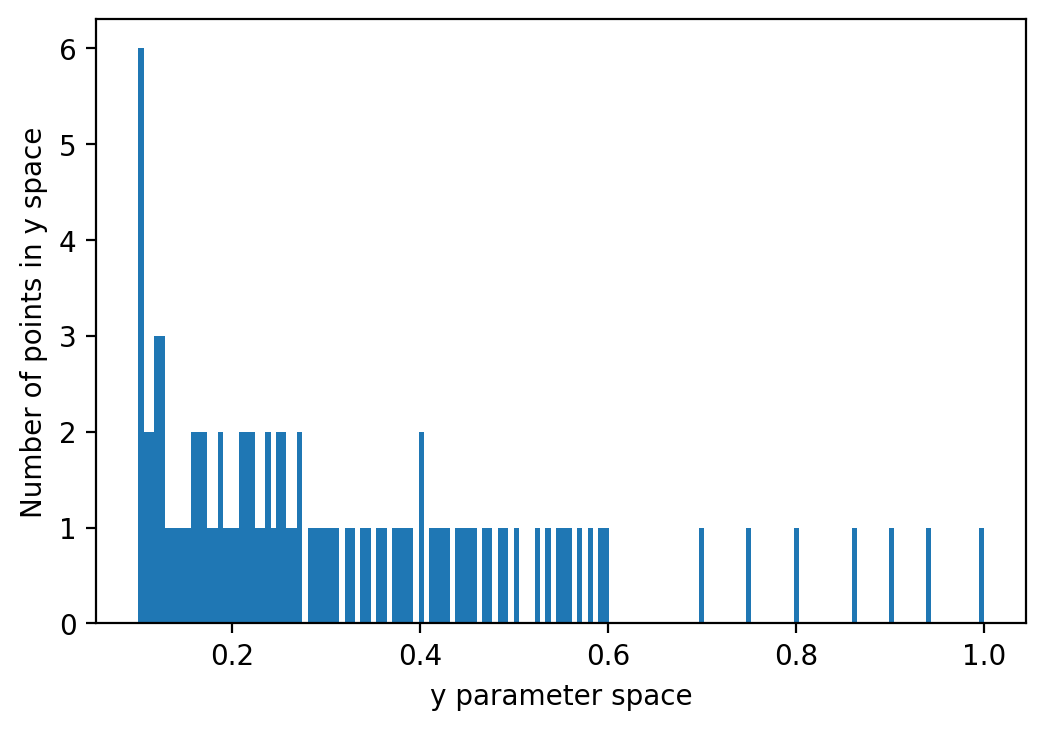

In [21]:
plt.figure(dpi=200)
plt.hist(greedy_points,bins=160)
plt.xlabel('y parameter space')
plt.ylabel('Number of points in y space')


# Truncating Ft to values around the peak, expecting better fits

In [22]:
y_min = 0.1
y_max = 1

In [23]:
def extended_time():
    Ft_ymin=Ft(y_min,times,100,0.5)
    Ft_min_peak_index=np.argmax(Ft_ymin)
    t_ymin_peak=Ft_ymin[Ft_min_peak_index]
    print(t_ymin_peak,"t_ymin_peak")
    extended_time_value=np.abs(t_ref-t_ymin_peak)
    return extended_time_value

extended_time_value=extended_time()
print("Extended time is:",extended_time_value)

5.351119246714164 t_ymin_peak


NameError: name 't_ref' is not defined

In [24]:

Ml=100.0
zl=0.5
y_min = 0.1
y_max = 1.0    #This was changed from 2 to 1
param_boundaries = [[y_min, y_max]]
times = np.arange(0.0, 3.5, 1 / 4096)       # changed tmax to be smaller and sampling rate to be more dense    






def Ft_truncated(y, times, Ml, zl, dt_fac=35.0):
    point_lens = PointLens(y)
    ts = 8 * np.pi * lal.MTSUN_SI * Ml * (1 + zl)
    f_min, f_max = 10.0, 1000.0
    t_max = 3.5                             # changed tmax to 5.5
    wmin = ts * f_min
    wmax = ts * f_max
    dt = min(np.pi / wmax / dt_fac, point_lens.img_td / dt_fac)  ##HAD NOTICED REDUCED ERRORS WITH INCREASED dt
    compute_Ft_params = {
        "lens": point_lens,
        "t_max": t_max,
        "dt": dt,
        "verbose": False,
    }
    t, Ft = Ftilde(**compute_Ft_params)
    FtNew = np.interp(times, t, Ft)
    #logging.debug("Ft calculated to be ", {Ft} )
    return FtNew

def t_reference_calculator():
    Ft_ymax=Ft(y_max,times,Ml=100,zl=0.5,dt_fac=35.0)
    max_index=np.argmax(Ft_ymax)
    return times[max_index]                        # should this be times?

t_reference=t_reference_calculator()

def extended_time():
    Ft_ymin=Ft(y_min,times,100,0.5)
    Ft_min_peak_index=np.argmax(Ft_ymin)
    t_ymin_peak=Ft_ymin[Ft_min_peak_index]
    extended_time_value=np.abs(t_reference-t_ymin_peak)
    return extended_time_value

extended_time_value=extended_time()

new_extended_times=np.arange(0.1,3.5+extended_time_value,1/4096)             # 30 WAS CHANGED TO 5.5

Ft_rightmost_shifted=Ft(0.1, times, 100, 0.5)
t_reff=t_reference
peak_index=np.argmax(Ft_rightmost_shifted)
t_peakk=times[peak_index]                                                      #Find the peak time
t_shift_ymin=np.abs(t_reff-t_peakk)  
left_cutoff_index=np.argmin(np.abs(t_shift_ymin-new_extended_times))
#left_cutoff_time=new_extended_times[left_cutoff_index]
right_cutoff_time=3.5
right_cutoff_index=np.argmin(np.abs(right_cutoff_time-new_extended_times))

def Ft_shifted_truncated(y, times,t_ref=t_reference, Ml=100.0, zl=0.5, dt_fac=35.0):   
    print("Ft shifted function called with y =",y)
    point_lens = PointLens(y)
    #print(lal.MTSUN_SI,"<--M_sun", Ml,"<--ML",zl,"<--zl")
    ts = 8 * np.pi * lal.MTSUN_SI * 100.0 * (1 + 0.5)
    f_min, f_max = 10.0, 1000.0
    t_max = 3.5
    wmin = ts * f_min
    wmax = ts * f_max
    dt = min(np.pi / wmax / dt_fac, point_lens.img_td / dt_fac)  ##HAD NOTICED REDUCED ERRORS WITH INCREASED dt
    compute_Ft_params = {
        "lens": point_lens,
        "t_max": t_max,
        "dt": dt,
        "verbose": False,
    }
    t, Ft = Ftilde(**compute_Ft_params)
    
    FtNew=np.interp(times, t, Ft)
    peak_index=np.argmax(FtNew)
    t_peak=times[peak_index]                                                      #Find the peak time
    t_shift=np.abs(t_ref-t_peak)                                                    #Fine how much to shift the time to align the peak with t_ref
    print("t_shift is:",t_shift)
        
    
    
    Ft_extended=[]
    for time in new_extended_times:
       

        if t_shift_ymin<=time<=3.5:
            Ft_extended.extend([FtNew[np.argmin(np.abs(times-np.abs((time -t_shift))))]])    
            #print("This is the result of the Ft_extended function:", Ft_extended)
    print("Ft extended was calculated and returned")        
    return Ft_extended
 

#---------------------------------------------------------\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\----------------------------------------




def truncated_Ft_shifted(y, times, Ml=100, zl=0.5, dt_fac=5.0):
    full_Ft_shifted=Ft_shifted_2(y, times,t_ref=t_reference, Ml=100.0, zl=0.5, dt_fac=5.0)
    return full_Ft_shifted[left_cutoff_index:right_cutoff_index]

In [25]:
Ft_shifted_truncated(0.2, times,t_ref=t_reference, Ml=100.0, zl=0.5, dt_fac=5.0)

Ft shifted function called with y = 0.2
t_shift is: 1.69091796875
Ft extended was calculated and returned


[2.003049529281179,
 2.0035148005205023,
 2.0039800717598255,
 2.0044453429991482,
 2.0049106142384714,
 2.0053758854777946,
 2.0058411567171173,
 2.0063064279564404,
 2.0067716991957636,
 2.0072369704350863,
 2.0077022416744095,
 2.0081675129137326,
 2.0086327841530554,
 2.0090980553923785,
 2.0095633266317017,
 2.0100285978710244,
 2.0104938691103476,
 2.0109591403496707,
 2.0114244115889934,
 2.0118896828283166,
 2.0123549540676398,
 2.0128202253069625,
 2.0132854965462856,
 2.013750767785609,
 2.0142160390249315,
 2.0146813102642547,
 2.015146581503578,
 2.0156118527429006,
 2.0160771239822237,
 2.016542395221547,
 2.0170076664608696,
 2.0174729377001928,
 2.017938208939516,
 2.018403480178839,
 2.018868751418162,
 2.019334022657485,
 2.019799293896808,
 2.020264565136131,
 2.020729836375454,
 2.021195107614777,
 2.0216603788541,
 2.022125650093423,
 2.022590921332746,
 2.023056192572069,
 2.023521463811392,
 2.0239867350507152,
 2.024452006290038,
 2.024917277529361,
 2.0253825487

In [48]:
plt.figure()

3677 11059
70246
7382
7382


Ft shifted function called with y = 0.1
t_shift is: 1.8955078125
Ft extended was calculated and returned
Ft shifted function called with y = 0.1988888888888889
t_shift is: 1.6923828125
Ft extended was calculated and returned
Ft shifted function called with y = 0.2977777777777778
t_shift is: 1.4892578125
Ft extended was calculated and returned
Ft shifted function called with y = 0.3966666666666666
t_shift is: 1.2861328125
Ft extended was calculated and returned
Ft shifted function called with y = 0.4955555555555555
t_shift is: 1.0830078125
Ft extended was calculated and returned
Ft shifted function called with y = 0.5944444444444444
t_shift is: 0.8798828125
Ft extended was calculated and returned
Ft shifted function called with y = 0.6933333333333332
t_shift is: 0.67724609375
Ft extended was calculated and returned
Ft shifted function called with y = 0.7922222222222222
t_shift is: 0.4404296875
Ft extended was calculated and returned
Ft shifted function called with y = 0.8911111111111111

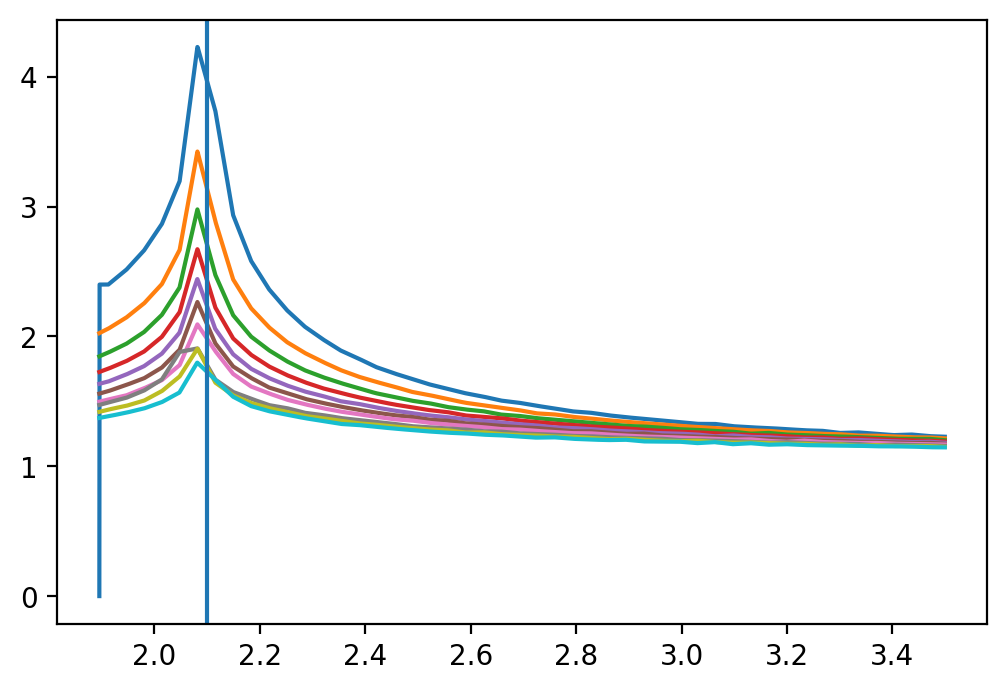

In [58]:
y_arr=np.linspace(0.1,0.99,10)
plt.figure(dpi=200)
for i in range(len(y_arr)):

 truncated_ft=truncated_Ft_shifted(y_arr[i],times,Ml=100, zl=0.5)
 plt.plot(new_extended_times[left_cutoff_index:right_cutoff_index],truncated_ft)
plt.axvline(x=2.085)


# Working with a new truncated Ft function 

In [22]:
def t_shift_calculator(y):
    ymin_index=np.argmax(Ft(0.1,times,Ml=100,zl=0.5))
    
    y_index=np.argmax(Ft(y,times,Ml=100,zl=0.5))
    
    tshift=np.abs(times[ymin_index]-times[y_index])
    return y_index-ymin_index
print(t_shift_calculator(0.339999))





988


In [27]:
tshift_max=t_shift_calculator(1)

In [28]:
print(tshift_max)

7696


In [5]:
times_left=np.arange(0.0, 3.0, 1 / 2048)    ###

In [215]:
def Ft_shifted_left(y, Ml=100.0, zl=0.5, dt_fac=30.0):   #t_ref=4.58544921875
    '''print("Ft shifted function called with y =",y)
    point_lens = PointLens(y)
    #print(lal.MTSUN_SI,"<--M_sun", Ml,"<--ML",zl,"<--zl")
    ts = 8 * np.pi * lal.MTSUN_SI * 100.0 * (1 + 0.5)
    f_min, f_max = 10.0, 1000.0
    t_max = 3.0+tshift_max   ###
    wmin = ts * f_min
    wmax = ts * f_max
    dt = min(np.pi / wmax / dt_fac, point_lens.img_td / dt_fac)  ##HAD NOTICED REDUCED ERRORS WITH INCREASED dt
    compute_Ft_params = {
        "lens": point_lens,
        "t_max": t_max,
        "dt": dt,
        "verbose": False,
    }
    t, Ft = Ftilde(**compute_Ft_params)
    #FtNew = np.interp(times, t, Ft)'''
    FtNew=Ft(y,times,Ml=100,zl=0.5)
    shifted_time_index=t_shift_calculator(y)
    #adjusted_times=np.arange(0.0+shifted_time, 3.5+shifted_time, 1 /2048) ###
    #Ftfinal=np.interp(adjusted_times, times, FtNew)
    return FtNew[shifted_time_index:shifted_time_index+(3*2048)]









In [27]:
def L2(original, prediction):
    diff = np.sqrt(np.sum(np.abs(original - prediction) ** 2))
    norm = np.sqrt(np.sum(np.abs(original) ** 2))
    return diff / norm

In [32]:
def mismatchNew(y):
    
    lens_params = {
        "Ml": 100.0,
        "zl": 0.5,
    }
    return L2(Ft_shifted_left(y, **lens_params), truncated_sur_model([np.log(y)]))

In [33]:
y_array=np.linspace(0.1,1,20)
mm=[]
for y in y_array:
    mm.append(mismatchNew(y))

NameError: name 'truncated_sur_model' is not defined

In [225]:
print(mm)

[0.002287861289070753, 0.032685443469615036, 0.013101653122636153, 0.00504100188406368, 0.0060663131712580445, 0.023572195287180908, 0.016380233670174705, 0.010468041576384245, 0.004673775922988347, 0.005493598614847269, 0.01755285903296742, 0.02916144255331658, 0.01199646159670925, 0.016531592755169005, 0.02115695976278071, 0.023752657945295474, 0.025659544609336123, 0.02763390284322756, 0.02596230650386387, 0.0023381760599096415]


In [219]:
print(y_array)

[0.1        0.14736842 0.19473684 0.24210526 0.28947368 0.33684211
 0.38421053 0.43157895 0.47894737 0.52631579 0.57368421 0.62105263
 0.66842105 0.71578947 0.76315789 0.81052632 0.85789474 0.90526316
 0.95263158 1.        ]


815
815
815
815
815
815
815
815
815
815


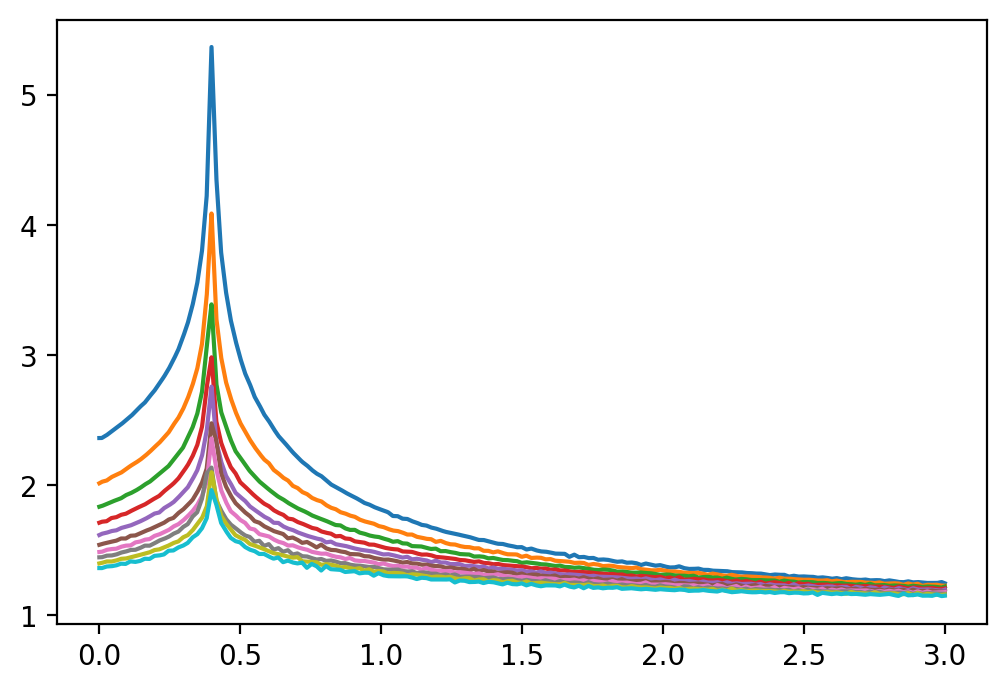

In [34]:
y_arr=np.linspace(0.1,1,100)
plt.figure(dpi=200)
for i in range(len(y_arr)):

 truncated_ft=Ft_shifted_left(y_arr[i],**lens_params)
 print(np.argmax(truncated_ft))
 plt.plot(times_left,truncated_ft)
#plt.axvline(x=0.2185)

Ft shifted function called with y = 0.14736842
0.010149906708537739 Peak mismatch


Text(0.5, 1.0, 'y=0.14 with mismatch = 0.032 (highest calculated)')

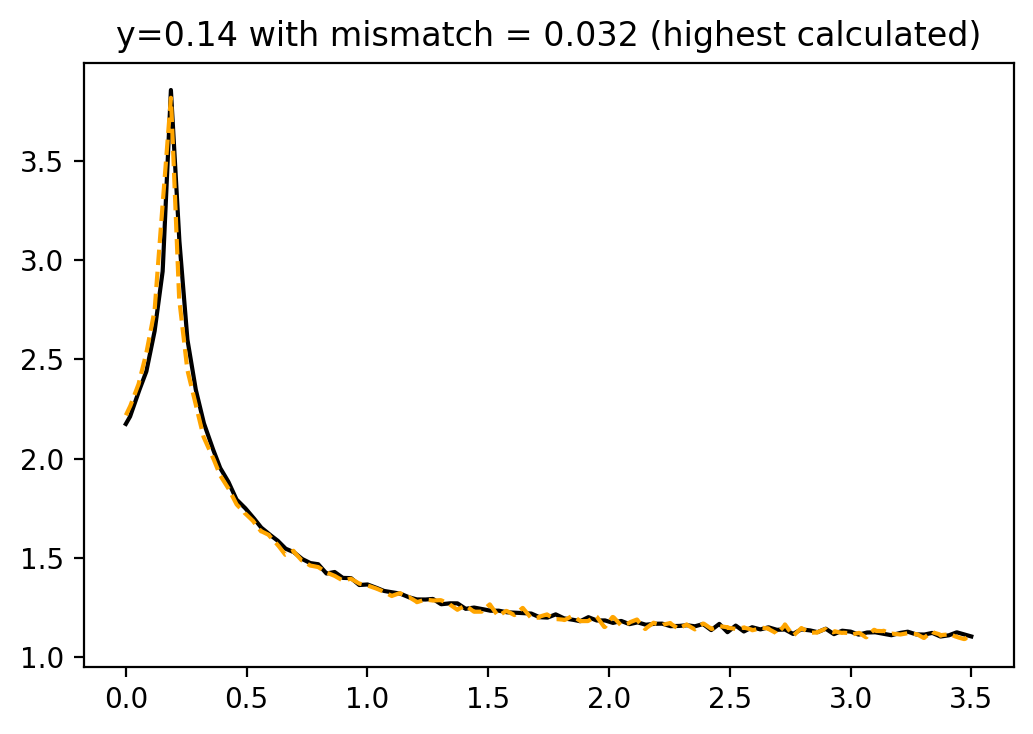

In [44]:
Ft_lefted1=Ft_shifted_left(0.14736842, **lens_params) 
truncated_model_calculated_Ft=truncated_sur_model([np.log(0.14736842)])
#print(np.abs(max(Ft_lefted1)-max(truncated_model_calculated_Ft))/max(Ft_lefted1),"Peak mismatch")
plt.figure(dpi=200)
plt.plot(times_left,Ft_lefted1,color='black')
plt.plot(times_left, truncated_model_calculated_Ft, linestyle='--',color='orange')
plt.title('y=0.14 with mismatch = 0.032 (highest calculated)')
#plt.plot(times_left,Ft_lefted2)
#plt.axvline(x=times_left[np.argmax(Ft_lefted1)],linestyle='--',color='red')

Ft shifted function called with y = 0.85789474
0.08194590856848637 Peak mismatch


Text(0.5, 1.0, 'y=0.85 with mismatch = 0.025 ')

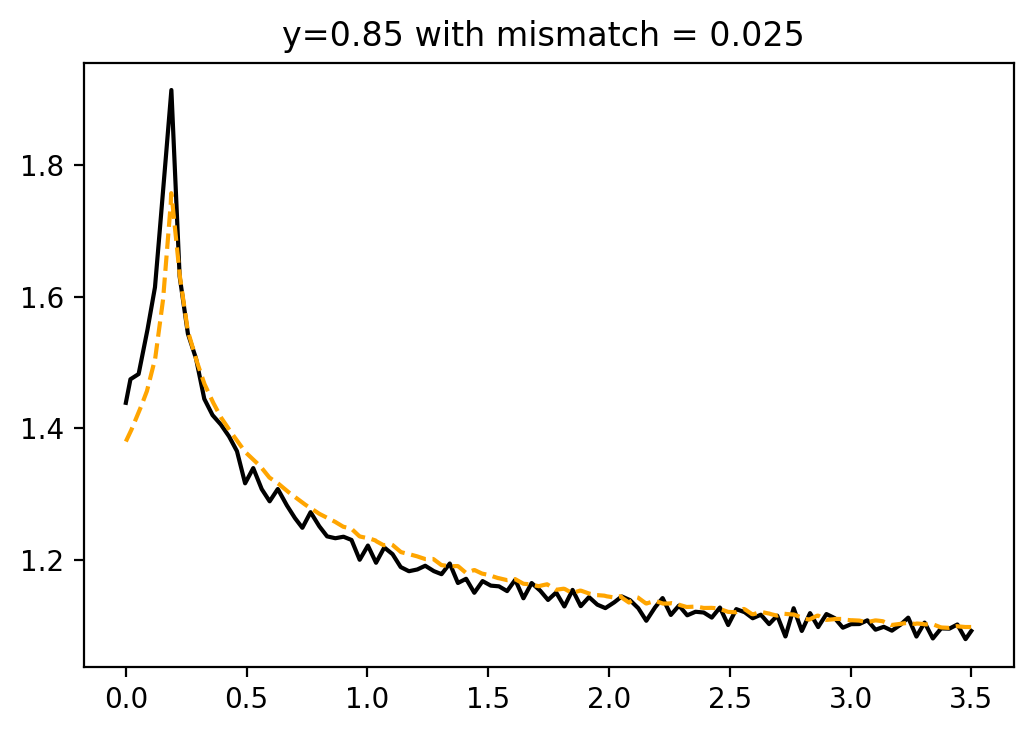

In [262]:
Ft_lefted1=Ft_shifted_left(0.85789474, **lens_params) 
truncated_model_calculated_Ft=truncated_sur_model([np.log(0.85789474)])
print(np.abs(max(Ft_lefted1)-max(truncated_model_calculated_Ft))/max(Ft_lefted1),"Peak mismatch")
plt.figure(dpi=200)
plt.plot(times_left,Ft_lefted1,color='black')
plt.plot(times_left, truncated_model_calculated_Ft, linestyle='--',color='orange')
plt.title('y=0.85 with mismatch = 0.025 ')
#plt.plot(times_left,Ft_lefted2)
#plt.axvline(x=times_left[np.argmax(Ft_lefted1)],linestyle='--',color='red')

## The mismatch definition is not catching this difference, why ? Lets check the mm array

In [256]:
difference1=(np.abs(Ft_shifted_left(0.85789474, **lens_params)- truncated_sur_model([np.log(0.85789474)])))/Ft_shifted_left(0.85789474, **lens_params)
difference2=(np.abs(Ft_shifted_left(0.14736842, **lens_params)- truncated_sur_model([np.log(0.14736842)])))/Ft_shifted_left(0.14736842, **lens_params)

Ft shifted function called with y = 0.85789474
Ft shifted function called with y = 0.85789474
Ft shifted function called with y = 0.14736842
Ft shifted function called with y = 0.14736842


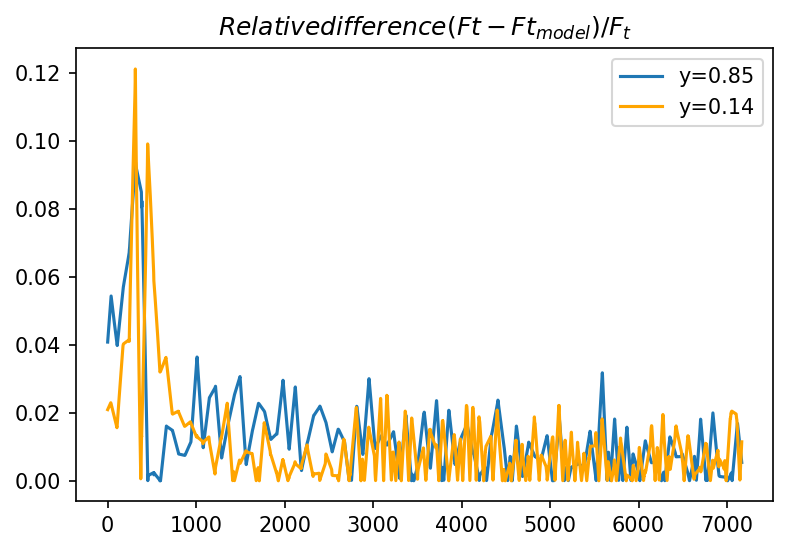

In [260]:
plt.figure(dpi=150)
plt.plot(difference1,label='y=0.85')
plt.plot(difference2,color='orange',label='y=0.14')
plt.title(r'$Relative difference (Ft-Ft_{model})/F_t$')
plt.legend()

In [236]:
for i in range(w):
    print(w[i])

Ft shifted function called with y = 0.85789474
[1.43835247 1.439275   1.44019753 ... 1.0910883  1.09134575 1.09160319]
[1.37957099 1.37994109 1.38031119 ... 1.09753496 1.09753365 1.09753233]


# Finding the density of greedy points and building a surrogate by sampling points from this distribution in y space 

In [7]:
print(len(times_left))

6144


In [8]:
a=[1,2,3]
b=[3,4,5]
a.append(b)
print(a)

[1, 2, 3, [3, 4, 5]]


In [95]:
Ft_array=[]
y_array=np.linspace(0.1,1,500)
for i in range(len(y_array)):
    Ft_array.append(Ft_shifted_left(y_array[i],**lens_params))
# The times array is times_left    

In [14]:
from joblib import Parallel, delayed
from tqdm import tqdm

In [16]:
lens_params = {
        "Ml": 100.0,
        "zl": 0.5}

In [216]:
y_array=np.linspace(0.1,1,500)
Ft_array=np.zeros_like(y_array)

Ft_array= Parallel(n_jobs=16)(
            delayed(Ft_shifted_left)(y,**lens_params) for y in tqdm(y_array))

100%|██████████| 500/500 [22:25<00:00,  2.69s/it]


In [24]:
print(len(Ft_array))

500


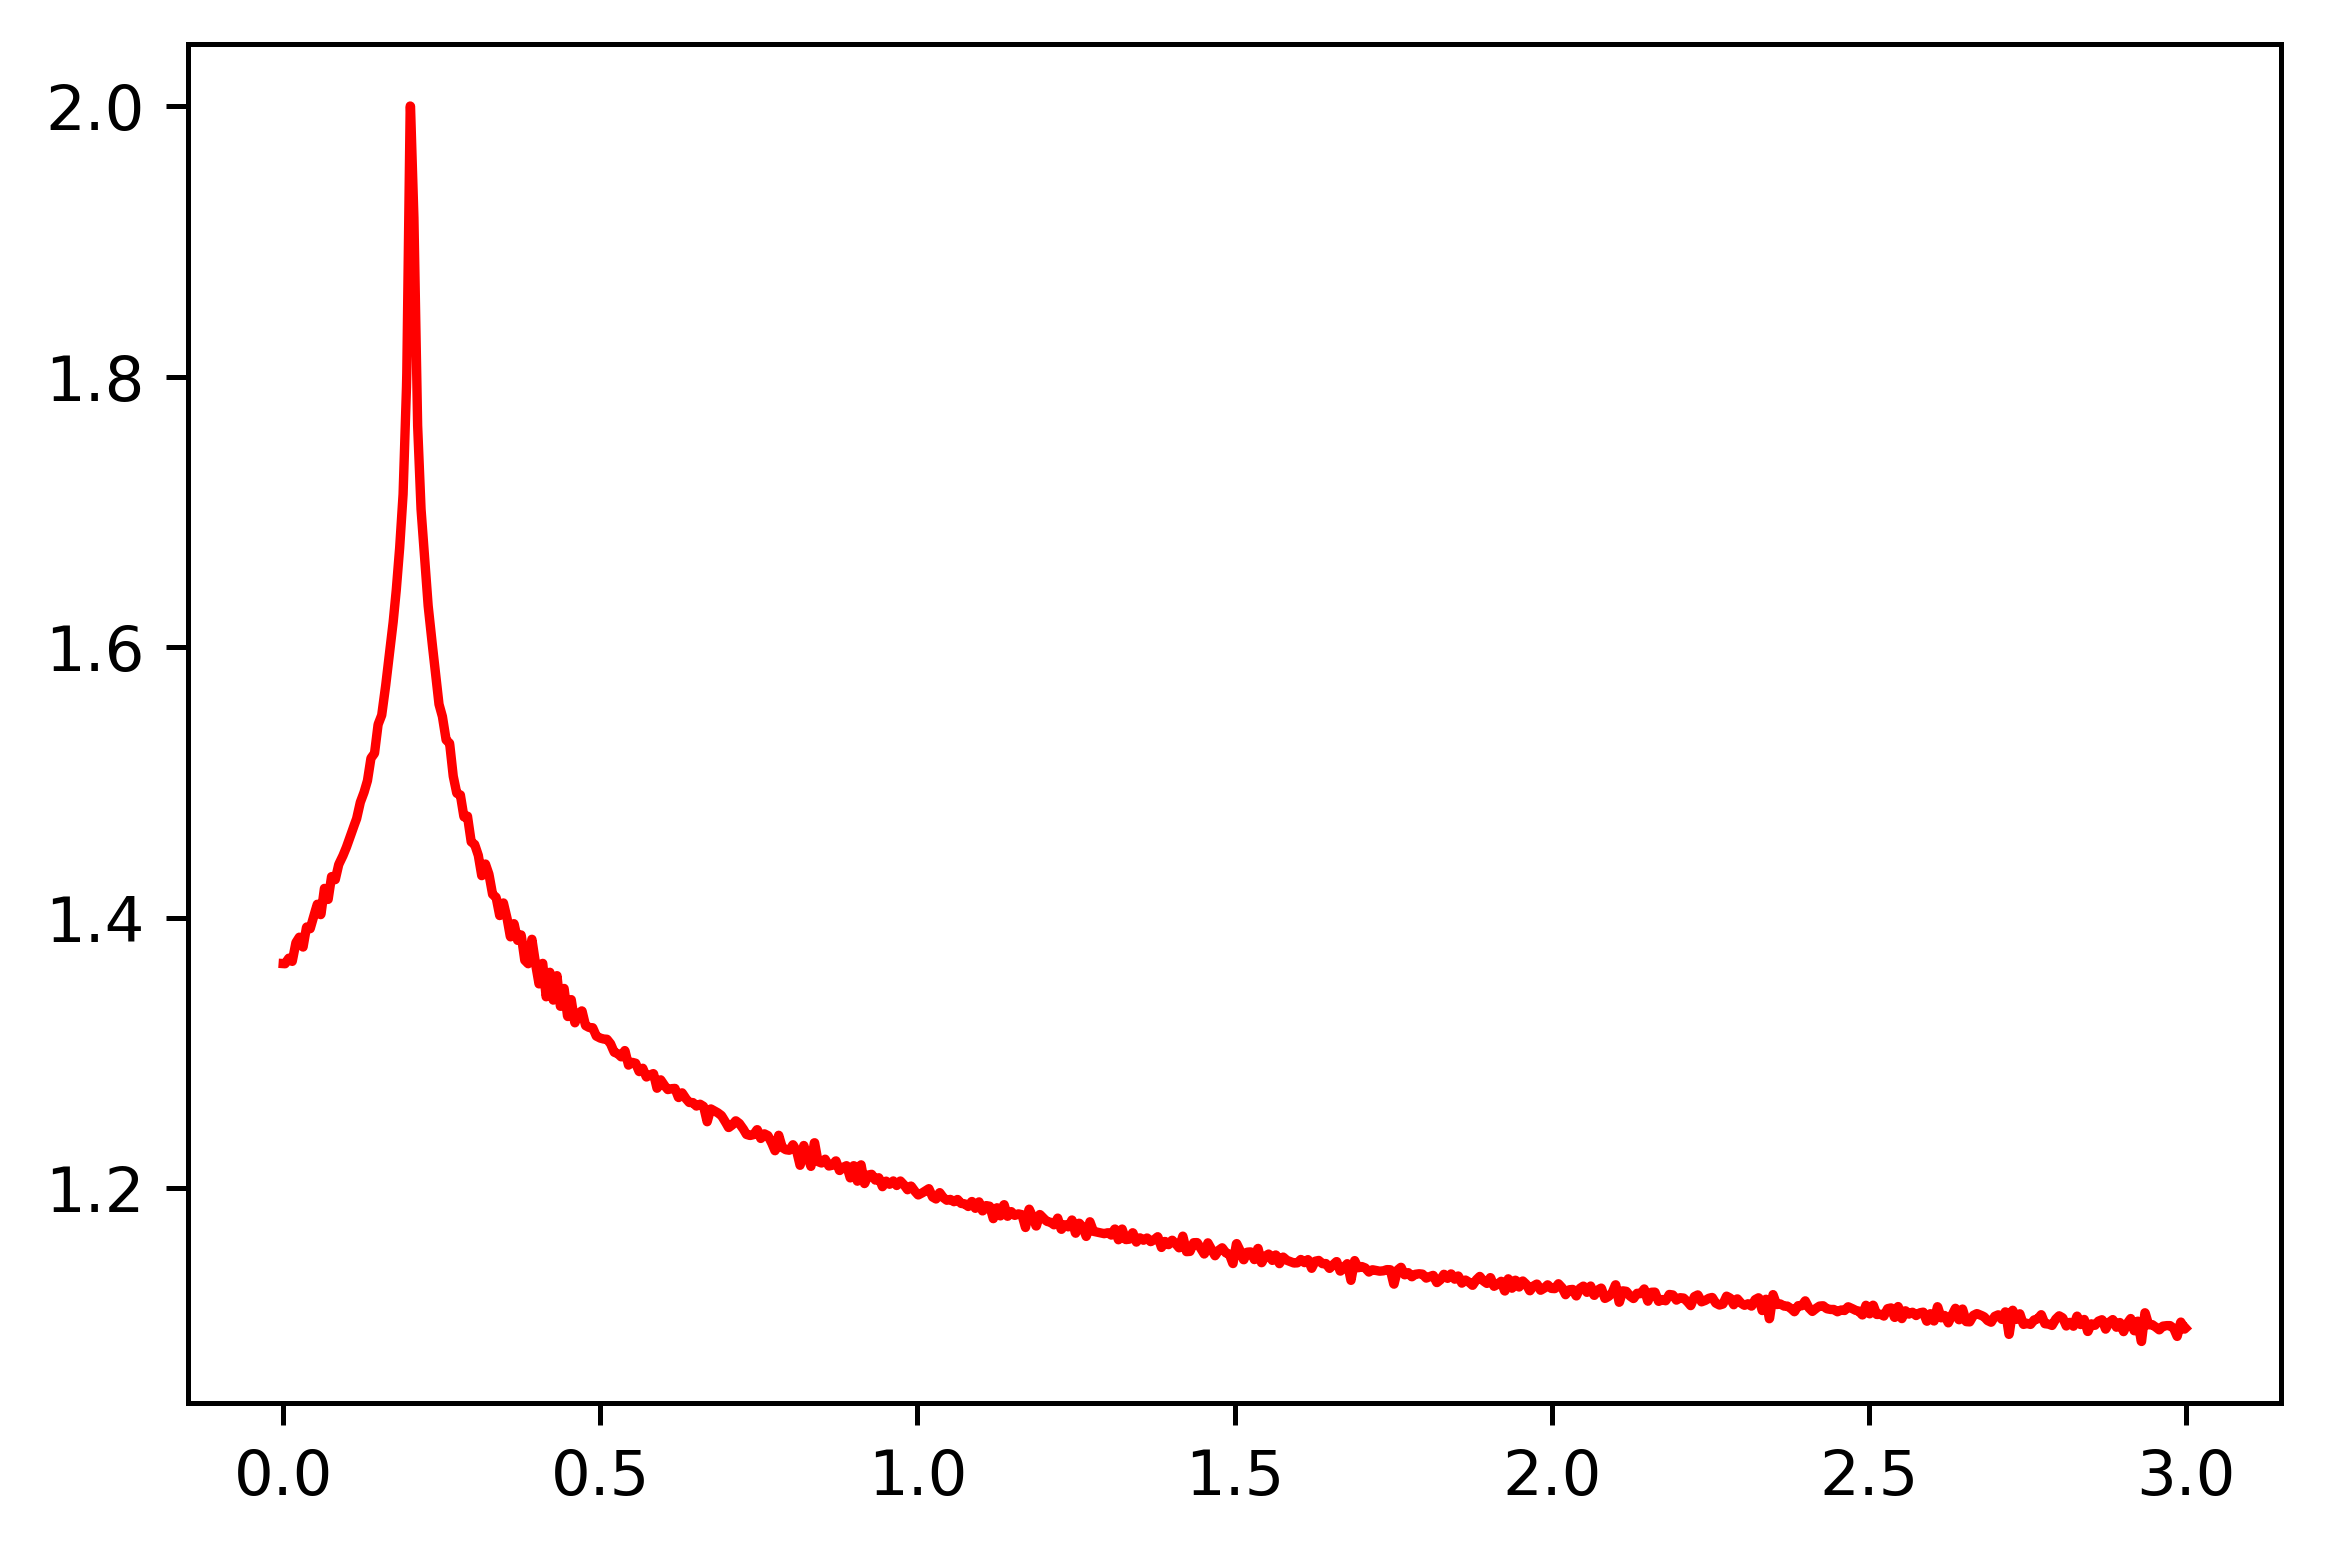

In [217]:
# Plot and check the functions
plt.figure(dpi=450)
#plt.plot(times_left,Ft_array[470],color='pink')
#plt.plot(times_left,Ft_array[459])

plt.plot(times_left,Ft_array[499],color='red')

#for i in range(5):
# plt.plot(times_left,Ft_array[400+20*i])



In [218]:
# Make a function that calculates the mismatch between consecutive Ft functions

# Define consecutive mismatch calculator
def consecutive_mismatch_calculator(i):
    
    return L2(Ft_array[i+1],Ft_array[i])


#Define index array 
mm=np.zeros(499)
for i in range(len(mm)):
    print(i)
    mm[i]=consecutive_mismatch_calculator(i)



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [219]:
print(mm)

[0.01213591 0.0187725  0.01047036 0.0138075  0.02010441 0.01014976
 0.01909728 0.01270156 0.0099599  0.01746728 0.01099913 0.01042053
 0.01696378 0.00987752 0.01137782 0.0173464  0.00937691 0.01982745
 0.01376713 0.00927551 0.01694744 0.01081513 0.00942677 0.01585451
 0.00970843 0.00997555 0.01566196 0.00885974 0.01117772 0.01647274
 0.00846032 0.01973869 0.01424952 0.00850182 0.01797504 0.0122661
 0.00879662 0.01725167 0.01129562 0.00958028 0.01739297 0.01067214
 0.01105458 0.01604274 0.00797903 0.01539542 0.01014438 0.00794114
 0.01420952 0.0088929  0.00827987 0.01379441 0.00816379 0.00897814
 0.01398661 0.00767649 0.01031086 0.01517765 0.00752711 0.01674348
 0.01165002 0.0076791  0.0156725  0.01046999 0.00791231 0.01526278
 0.00988533 0.00831485 0.01303684 0.00714489 0.00933533 0.01381685
 0.0069427  0.01620373 0.01155795 0.00704705 0.01500967 0.01024599
 0.0074171  0.01468178 0.0095742  0.00794663 0.01464925 0.00895496
 0.00896255 0.01543467 0.00886215 0.01370107 0.00727506 0.00875

Text(0, 0.5, 'Mismatch between consecutive waves')

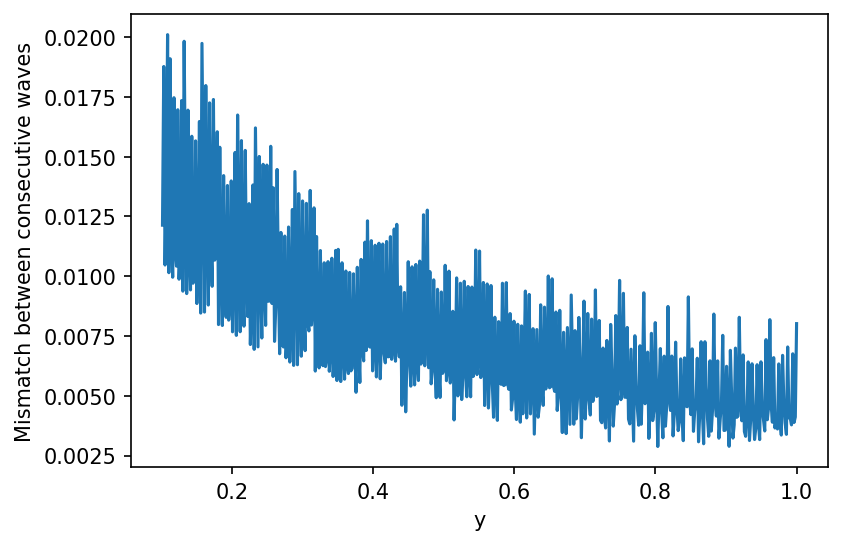

In [220]:
plt.figure(dpi=150)
plt.plot(y_array[1:],mm)
plt.xlabel('y')
plt.ylabel('Mismatch between consecutive waves')

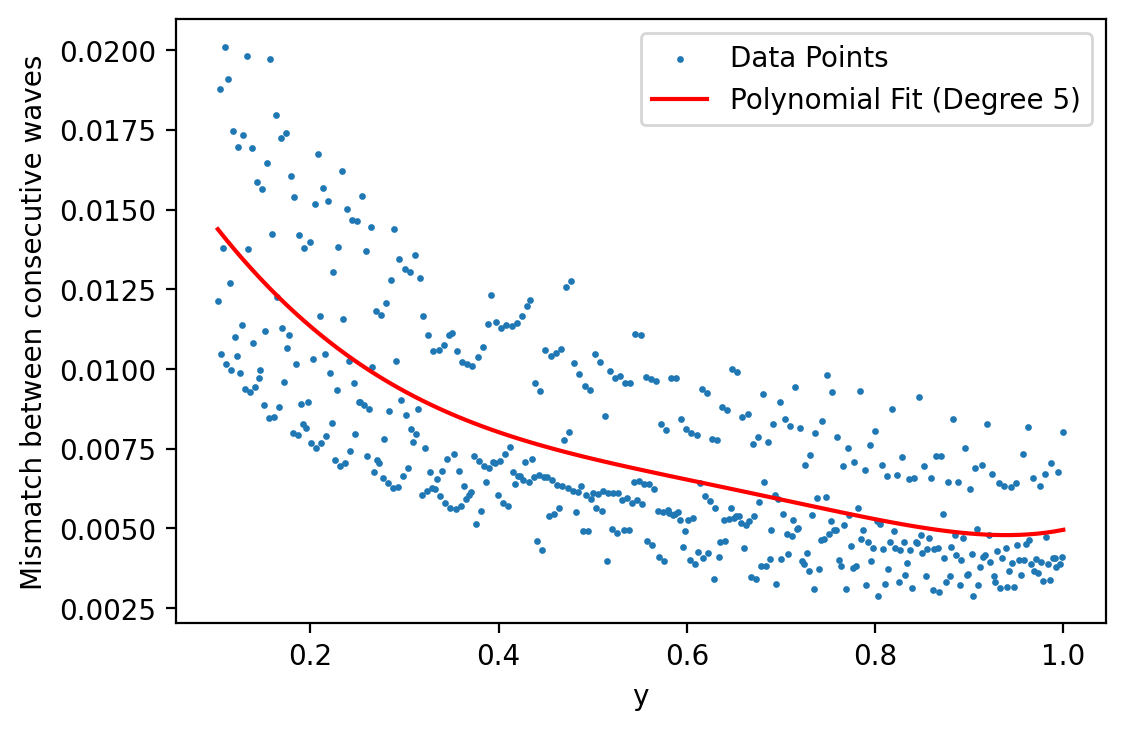

In [221]:
import numpy as np
import matplotlib.pyplot as plt



# Set the degree of the polynomial fit
degree = 5

# Fit the polynomial
coefficients = np.polyfit(y_array[1:], mm, degree)

# Create a polynomial function using the coefficients
poly_function = np.poly1d(coefficients)

# Generate y_array[1:] values for the fitted polynomial curve
x_fit = np.linspace(min(y_array[1:]), max(y_array[1:]), 100)

# Calculate mm values using the fitted polynomial function
y_fit = poly_function(x_fit)
plt.figure(dpi=200)
# Plot the original data points and the fitted polynomial curve
plt.scatter(y_array[1:], mm, label='Data Points',s=2)
plt.plot(x_fit, y_fit, label=f'Polynomial Fit (Degree {degree})', color='red')
plt.xlabel('y')
plt.ylabel('Mismatch between consecutive waves')
plt.legend()
plt.show()


In [222]:
# Treat the above as a pdf of the sampling density of greedy points required to build a surrogate
# The spacing between the greedy points should be directly related to the way mismatch is behaving

def greedy_points_calculator(N,ymax=1,ymin=0.1): # Optimize this to include taking input values of y_min and y_max. For now the y range is fixed from 0.1 to 1
    scaled_y_array=np.linspace(0.1,1,N)
    greedy_points=np.zeros_like(scaled_y_array)
    greedy_points[0]=0.1
    y_range=(ymax-ymin)
    mm_range=poly_function(0.1)- poly_function(1)
    max_mm=poly_function(0.1)

    for i in range(len(scaled_y_array)-1):
        mm_scale_factor= np.abs(poly_function(scaled_y_array[N-(i+2)])-poly_function(scaled_y_array[N-(i+1)])    )
        greedy_points[i+1]=greedy_points[i]+ (y_range*mm_scale_factor/mm_range)
        greedy_scale_factor=y_max/max(greedy_points)
        #greedy_points=greedy_points*greedy_scale_factor
        greedy_points_rescaled=greedy_points/max(greedy_points)
    return greedy_points_rescaled    


## The above method might not be accurate because as it is done above, the distance between consecutive greedy points in lower y ranges is proportional to the height difference in the higher y range. But let say that the higher y space has a large dip in height at some y. Now this will reflect in the spacing we choose in the lower y range greedy points which should not happen. What needs to be done is that the spacing in greedy points should ideally be sampled from the polynomial fit function treated as a pdf

[0.09694473 0.10074192 0.10394044 0.10657112 0.10866385 0.1102476
 0.11135043 0.11199949 0.11222108 0.11240159 0.11295967 0.11387167
 0.11511476 0.11666697 0.11850717 0.12061502 0.12297102 0.12555645
 0.12835339 0.1313447  0.13451399 0.13784566 0.14132485 0.14493743
 0.14867002 0.15250992 0.1564452  0.16046457 0.16455748 0.16871402
 0.17292498 0.1771818  0.18147656 0.185802   0.19015147 0.19451896
 0.19889905 0.20328694 0.20767841 0.21206983 0.21645812 0.22084078
 0.22521585 0.22958192 0.23393811 0.23828405 0.24261988 0.24694626
 0.25126433 0.2555757  0.25988246 0.26418717 0.26849282 0.27280287
 0.27712118 0.28145205 0.28580019 0.29017069 0.29456907 0.2990012
 0.30347333 0.30799206 0.31256438 0.31719756 0.32189927 0.32667744
 0.33154034 0.33649655 0.34155493 0.34672461 0.35201502 0.35743581
 0.36299693 0.36870853 0.37458102 0.38062501 0.38685134 0.39327104
 0.39989534 0.40673563 0.41380351 0.42111071 0.42866912 0.43649077
 0.44458784 0.4529726  0.46165745 0.4706549  0.47997755 0.489638

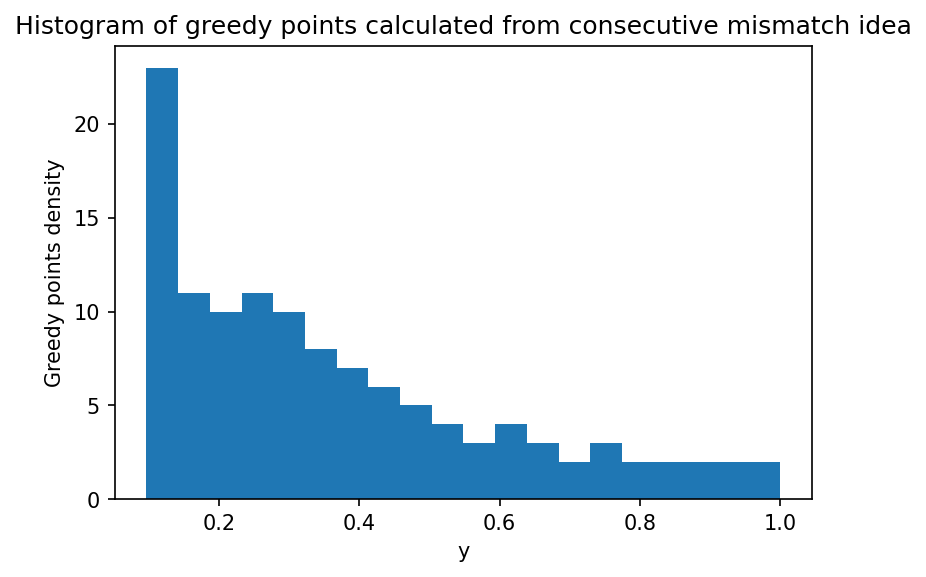

In [223]:
greedy_values=greedy_points_calculator(120)
plt.figure(dpi=150)
plt.hist(greedy_values,bins=20)
plt.xlabel('y')
plt.ylabel('Greedy points density')
plt.title('Histogram of greedy points calculated from consecutive mismatch idea')
print(greedy_values)

In [224]:
from scipy import integrate 
from scipy.interpolate import interp1d

# Instead lets sample points treating the polynomial fit as a pdf and see how the distribution changes

In [225]:
y_array_for_cdf=np.linspace(0.1,1,1000)
y_pdf_array=np.zeros_like(y_array_for_cdf)
for i in range(len(y_array_for_cdf)):
    y_pdf_array[i]=poly_function(y_array_for_cdf[i])
cdf_of_y=integrate.cumtrapz(y_pdf_array,y_array_for_cdf,initial=0)
cdf_of_y=cdf_of_y/cdf_of_y[-1]
icdf_of_y=interp1d(cdf_of_y,y_array_for_cdf)
greedy_samples= icdf_of_y(np.linspace(0,1,120))   

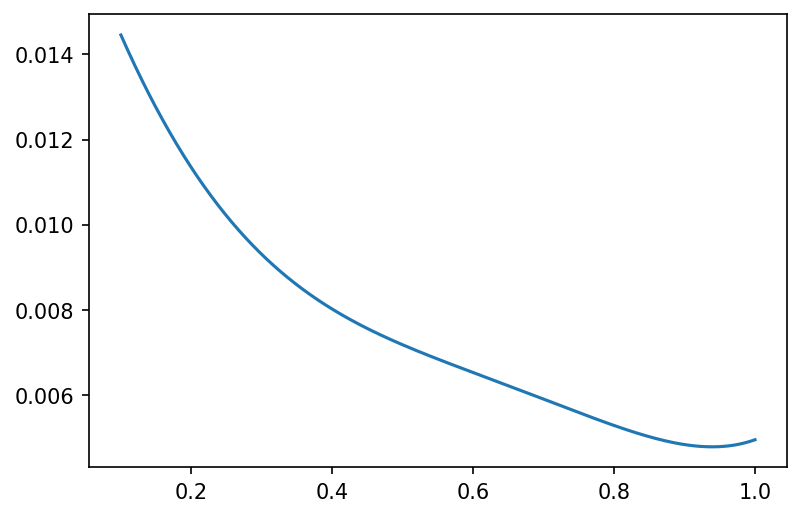

In [226]:
plt.figure(dpi=150)
plt.plot(y_array_for_cdf,y_pdf_array)

[0.1        0.10396019 0.10796094 0.11200347 0.11608808 0.12021588
 0.124387   0.12860277 0.13286351 0.13716989 0.14152268 0.14592271
 0.15037075 0.15486737 0.15941329 0.16400933 0.16865628 0.17335472
 0.17810529 0.18290869 0.18776613 0.19267764 0.19764445 0.20266674
 0.20774584 0.21288183 0.21807548 0.22332768 0.22863892 0.23400973
 0.23944068 0.24493233 0.25048523 0.25610007 0.26177706 0.26751653
 0.27331937 0.27918542 0.28511549 0.29110944 0.29716788 0.30329097
 0.3094788  0.31573156 0.32204937 0.3284323  0.33488037 0.34139353
 0.34797198 0.35461543 0.36132367 0.36809692 0.37493463 0.38183682
 0.38880329 0.39583367 0.40292778 0.41008537 0.4173062  0.42459001
 0.43193652 0.43934547 0.4468166  0.45434996 0.4619451  0.46960204
 0.47732066 0.485101   0.49294297 0.50084676 0.50881262 0.51684069
 0.52493135 0.53308504 0.54130229 0.54958377 0.55793036 0.56634278
 0.57482205 0.58336952 0.59198621 0.60067379 0.60943373 0.61826774
 0.62717773 0.63616578 0.6452341  0.65438503 0.66362107 0.6729

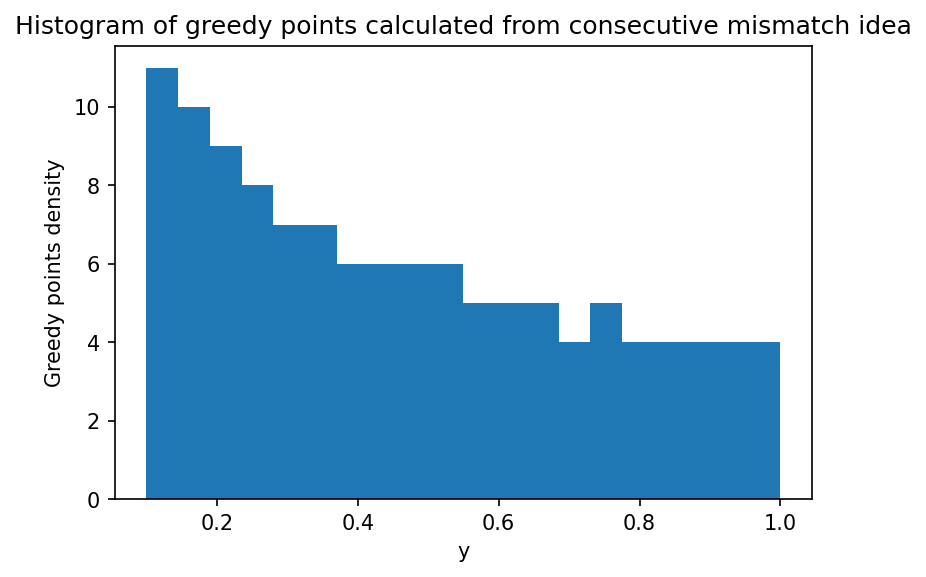

In [227]:
plt.figure(dpi=150)
plt.hist(greedy_samples,bins=20)
plt.xlabel('y')
plt.ylabel('Greedy points density')
plt.title('Histogram of greedy points calculated from consecutive mismatch idea')
print(greedy_samples)

In [228]:
def create_surrogate(params, times, atol, btol):       ## noticed that atol isnt used anywhere
    #print("create_surrogate function called")
    sur = pySur.DataModeler(times, "LensAmplification")
    #print("Surrogate created")
    for p in tqdm(params, desc="Training set: "):
    #print("starting loop")
    #for p in parms:
        y = p
        #print("y =",y ,"was set equal to the first element of training set")
        lens_params = {
            "Ml": 100.0,
            "zl": 0.5,
        }
        data = Ft_shifted_left(y, **lens_params)
        #print("Ft data generated")
        sur.addKnownDataSet(np.array([y]), data)     #np.log (y) changed to just y 
        #print("data set added to sur") 
    print("Creating Empirical Interpolant...")
    sur.createEmpiricalInterpolant(basisTol=btol)
    print("Running GPR fit...")
   
    sur.setupFits(minVals=[np.log(y_min)], maxVals=[np.log(y_max)], fitType="GPR")    ##Could use a different type of fit and try
    sur.fit(nProcs=16)
    print("Surrogate was created and returned")
    return sur

In [229]:
sur_model_dense=create_surrogate(greedy_samples,times_left, atol=1e-2, btol=1e-2)
if not os.path.exists("density_model_surrogate/"):
    sur_model_dense.save("density_model_surrogate/")
    print(f"Surrogate model saved.")
else:
    print("surrogate model already exists")


Training set: 100%|██████████| 120/120 [08:12<00:00,  4.10s/it]


Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 120 data sets with tol 0.01 for LensAmplification
...got 4 basis elements
Running GPR fit...
LensAmplification is fitting 4 nodes with 16 procs
Starting LensAmplification_node0_idx410 fit with 120 data points...Starting LensAmplification_node2_idx422 fit with 120 data points...Starting LensAmplification_node1_idx1715 fit with 120 data points...Starting LensAmplification_node3_idx398 fit with 120 data points...



...done fitting LensAmplification_node3_idx398
...done fitting LensAmplification_node2_idx422
...done fitting LensAmplification_node0_idx410
...done fitting LensAmplification_node1_idx1715
Surrogate was created and returned
surrogate model already exists


/usr/lib/python3.10/multiprocessing/pool.py:268: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=16>
  _warn(f"unclosed running multiprocessing pool {self!r}",


In [230]:

# Specify the directory where the surrogate model has been saved
surrogate_directory_density = "/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/RUNSURR_/density_model_surrogate"


# Create an instance of the DataModeler class
density_sur_model = pySur.DataModeler(times_left , "LensAmplification")

# Load the surrogate model from the specified directory
density_sur_model.load(surrogate_directory_density)

/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.344] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.344] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.344] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.344] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

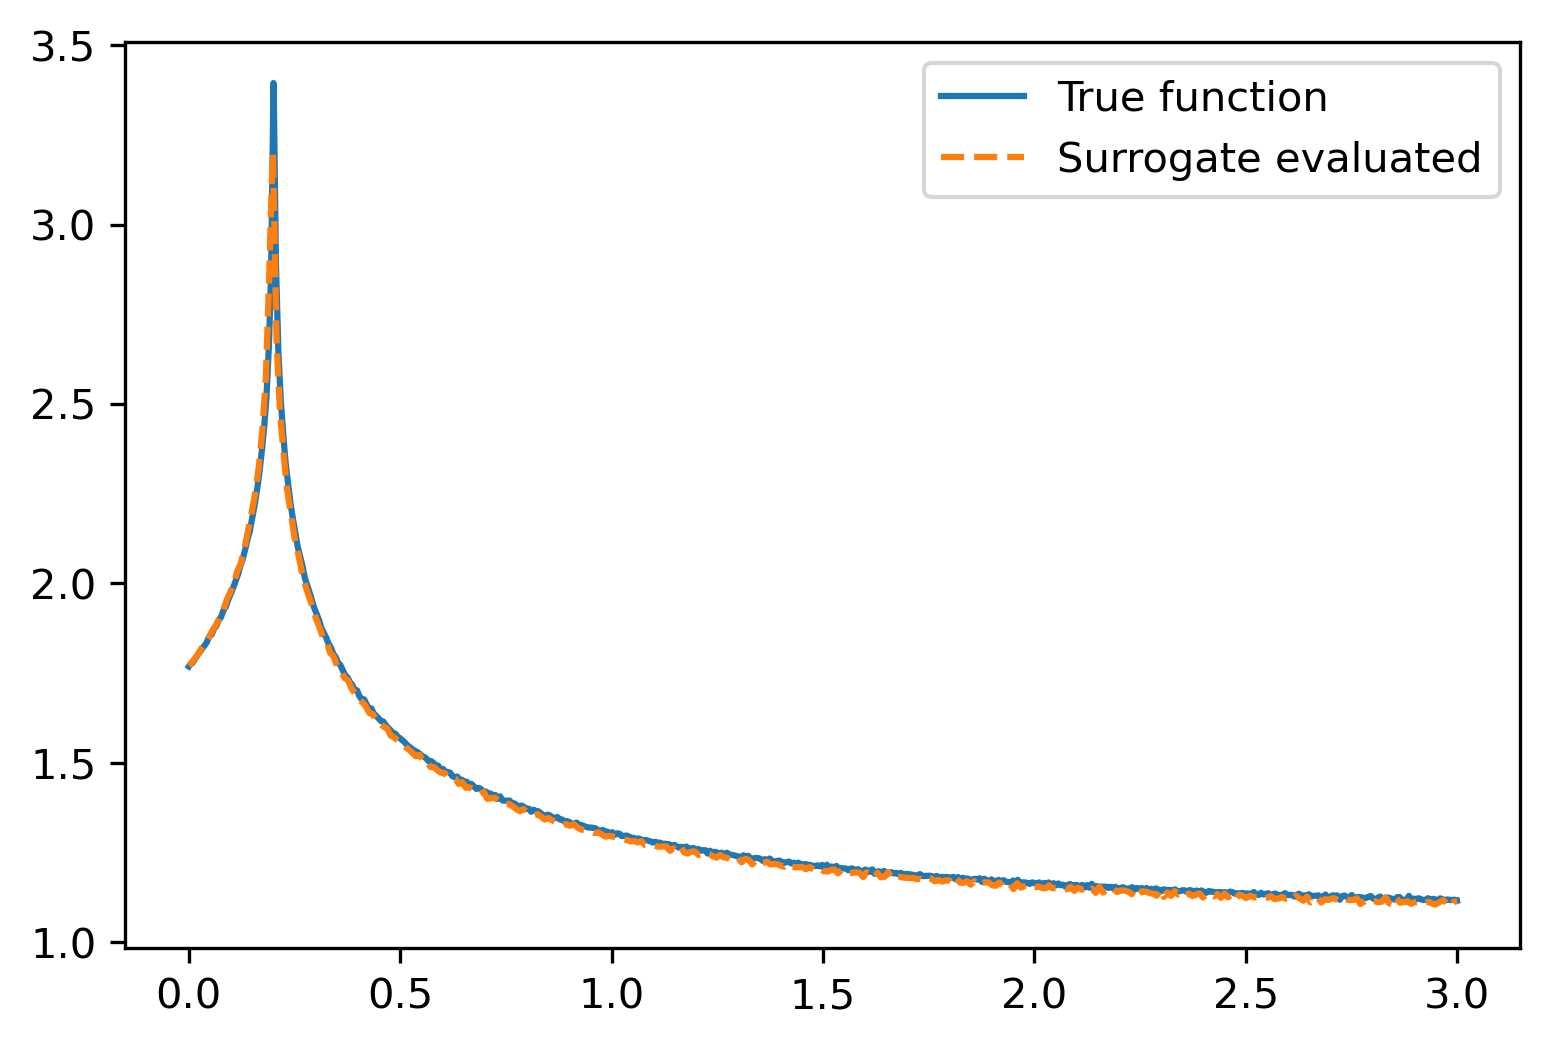

In [250]:
#Ft_density1=density_sur_model([np.log(0.644)])
Ft_density2=density_sur_model([0.344])
Ft_shifted1=Ft_shifted_left((0.344),**lens_params)
plt.figure(dpi=300)
#plt.plot(times_left,Ft_density1)
plt.plot(times_left,Ft_shifted1,label='True function')
plt.plot(times_left,Ft_density2,label='Surrogate evaluated',linestyle='--')

plt.legend()

In [80]:
ts=np.linspace(0.1,1,15)

/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.1] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.1] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.1] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.1] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModel

-------------------------------------------------------------------------


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.1] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.1] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.1] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.1] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModel

-------------------------------------------------------------------------
Max validation EI LInf error: 0.05095289065611919
Max validation EI RMS error: 0.012427562986795211
Max validation Full LInf error: 0.8247210379734136
Max validation Full RMS error: 0.08560841539708255
Max validation RB LInf error: 0.05768835168020914
Max validation RB RMS error: 0.005460294617849374

 ### Reducing cutoff ###
LensAmplification is fitting 5 nodes


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [1.] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [1.] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [1.] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [1.] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.p

Exception: Invalid option: absTol

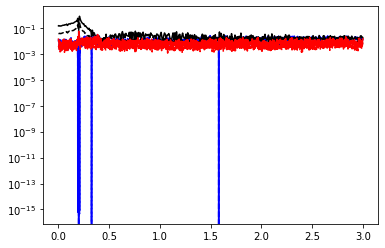

In [81]:
# That's it!  We can try evaluating the surrogate at the training points:
maxErr = 0.
for w in ts:
    exact_sol = Ft_shifted_left(w,**lens_params)

    sur_eval = density_sur_model(np.array([w]))
    maxErr = max(maxErr, max(abs(exact_sol - sur_eval)))
#print('Max training space LInf error: %s'%maxErr)




# And of course we can evaluate the surrogate at other points too!
# Let's use the surrogate's test function to keep track of the errors for us:
validationSpace = np.linspace(0.1,1,15)
print("-------------------------------------------------------------------------")
for w in validationSpace:
    exact_sol = Ft_shifted_left(w,**lens_params)

    test_evals = density_sur_model.test(np.array([w]), exact_sol) #this allows the surrogate to test for the errors
print("-------------------------------------------------------------------------")
colors = {'Full': 'k', 'RB': 'r', 'EI': 'b'}
for errType, errDict in density_sur_model.testErrors.items():
    for k in ['LInf', 'RMS']:
        print('Max validation %s %s error: %s'%(errType, k, max(errDict[k])))
    plt.semilogy(times_left, errDict['maxErrVsDomain'], colors[errType], label='%s (max)'%errType)
    plt.semilogy(times_left, errDict['rmsErrVsDomain'], colors[errType] + '--', label='%s (rms)'%errType)
#plt.legend(loc='upper left', ncol=2)
#plt.ylim((1.e-6, 1.))
#plt.show()

# Maybe we want smaller errors.  Let's fit with a smaller cutoff:
print('\n ### Reducing cutoff ###')
density_sur_model.clearCheckedErrors()
density_sur_model.fit(absTol=1.e-3)
for w in ts:
    exact_sol = Ft_shifted_left(w,**lens_params)
    test_evals = density_sur_model.test(np.array([w]), exact_sol)
for errType, errDict in density_sur_model.testErrors.items():
    for k in ['LInf', 'RMS']:
        print('Max training space %s %s error: %s'%(errType, k, max(errDict[k])))
density_sur_model.clearCheckedErrors()
for w in validationSpace:
    exact_sol = Ft_shifted_left(w,**lens_params)
    test_evals = density_sur_model.test(np.array([w]), exact_sol)
for errType, errDict in density_sur_model.testErrors.items():
    for k in ['LInf', 'RMS']:
        print('Max validation %s %s error: %s'%(errType, k, max(errDict[k]))) 
    plt.semilogy(times_left, errDict['maxErrVsDomain'], colors[errType], label='%s (max)'%errType)
    plt.semilogy(times_left, errDict['rmsErrVsDomain'], colors[errType] + '--', label='%s (rms)'%errType)
plt.legend(loc='upper left', ncol=2)
plt.ylim((1.e-6, 1.))
plt.show()

## Code that calculates mismatch between the surrogate reproduced waveform and the actual waveform for the worst case as a function of the number of greedy parameters

In [252]:
def highest_mismatch_calculator(i):
    # samples the greedy parameters
    greedy_samples= icdf_of_y(np.linspace(0,1,i)) 
    
    # create the surrogate
    sur_model_dense=create_surrogate(greedy_samples,times_left, atol=1e-2, btol=1e-2)
    if not os.path.exists("density_model_surrogate/"):
        sur_model_dense.save("density_model_surrogate/")
        print(f"Surrogate model saved.")
    else:
        print("surrogate model already exists")
        
    
    # Specify the directory where the surrogate model has been saved
    surrogate_directory_density = "/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/RUNSURR_/density_model_surrogate"
    
    
    # Create an instance of the DataModeler class
    density_sur_model = pySur.DataModeler(times_left , "LensAmplification")
    
    # Load the surrogate model from the specified directory
    density_sur_model.load(surrogate_directory_density)
    
    highest_mismatch=L2(Ft_shifted_left((0.944),**lens_params),density_sur_model([0.944]))
    return highest_mismatch

In [253]:
highest_mismatch_calculator(10)

Training set: 100%|██████████| 10/10 [00:44<00:00,  4.42s/it]

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 10 data sets with tol 0.01 for LensAmplification
...got 4 basis elements
Running GPR fit...
LensAmplification is fitting 4 nodes with 16 procs


Starting LensAmplification_node3_idx422 fit with 10 data points...Starting LensAmplification_node2_idx399 fit with 10 data points...Starting LensAmplification_node0_idx410 fit with 10 data points...Starting LensAmplification_node1_idx1715 fit with 10 data points...



...done fitting LensAmplification_node0_idx410...done fitting LensAmplification_node1_idx1715

...done fitting LensAmplification_node3_idx422
...done fitting LensAmplification_node2_idx399


/usr/lib/python3.10/multiprocessing/pool.py:268: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=16>
  _warn(f"unclosed running multiprocessing pool {self!r}",


Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

0.02345120310392912

## Plot of highest mismatch v/s no of greedy parameters using the above function

In [265]:
greedy_points_number_array=np.linspace(50,149,100)
highest_mm_array=np.zeros_like(greedy_points_number_array)
for i in greedy_points_number_array:
    highest_mm_array[int(i)-50]=highest_mismatch_calculator(int(i))

Training set: 100%|██████████| 50/50 [03:46<00:00,  4.53s/it]

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 50 data sets with tol 0.01 for LensAmplification
...got 4 basis elements
Running GPR fit...
LensAmplification is fitting 4 nodes with 16 procs


Starting LensAmplification_node2_idx398 fit with 50 data points...Starting LensAmplification_node1_idx3148 fit with 50 data points...Starting LensAmplification_node3_idx422 fit with 50 data points...Starting LensAmplification_node0_idx410 fit with 50 data points...



...done fitting LensAmplification_node1_idx3148
...done fitting LensAmplification_node3_idx422
...done fitting LensAmplification_node0_idx410
...done fitting LensAmplification_node2_idx398


/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 0.009000000000000001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 0.01. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 0.01. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/lib/python3.10/multiprocessing/pool

Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 51 data sets with tol 0.01 for LensAmplification
...got 4 basis elements
Running GPR fit...
LensAmplification is fitting 4 nodes with 16 procs


Starting LensAmplification_node2_idx422 fit with 51 data points...Starting LensAmplification_node0_idx410 fit with 51 data points...Starting LensAmplification_node3_idx399 fit with 51 data points...Starting LensAmplification_node1_idx2905 fit with 51 data points...



...done fitting LensAmplification_node1_idx2905
...done fitting LensAmplification_node2_idx422
...done fitting LensAmplification_node3_idx399...done fitting LensAmplification_node0_idx410



/usr/lib/python3.10/multiprocessing/pool.py:268: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=16>
  _warn(f"unclosed running multiprocessing pool {self!r}",


Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 52 data sets with tol 0.01 for LensAmplification
...got 4 basis elements
Running GPR fit...
LensAmplification is fitting 4 nodes with 16 procs


Starting LensAmplification_node1_idx1715 fit with 52 data points...Starting LensAmplification_node3_idx399 fit with 52 data points...Starting LensAmplification_node2_idx422 fit with 52 data points...Starting LensAmplification_node0_idx410 fit with 52 data points...



...done fitting LensAmplification_node2_idx422...done fitting LensAmplification_node1_idx1715

...done fitting LensAmplification_node3_idx399
...done fitting LensAmplification_node0_idx410


/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 0.01. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 0.009000000000000001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 0.01. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/gopalprabhu/.local/lib/python3.10/

Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 53 data sets with tol 0.01 for LensAmplification
...got 5 basis elements
Running GPR fit...
LensAmplification is fitting 5 nodes with 16 procs


Starting LensAmplification_node1_idx2409 fit with 53 data points...Starting LensAmplification_node2_idx398 fit with 53 data points...Starting LensAmplification_node4_idx733 fit with 53 data points...Starting LensAmplification_node3_idx422 fit with 53 data points...Starting LensAmplification_node0_idx410 fit with 53 data points...




...done fitting LensAmplification_node0_idx410
...done fitting LensAmplification_node2_idx398
...done fitting LensAmplification_node3_idx422...done fitting LensAmplification_node1_idx2409

...done fitting LensAmplification_node4_idx733


/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 0.01. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/lib/python3.10/multiprocessing/pool.py:268: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=16>
  _warn(f"unclosed running multiprocessing pool {self!r}",


Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 54 data sets with tol 0.01 for LensAmplification
...got 4 basis elements
Running GPR fit...
LensAmplification is fitting 4 nodes with 16 procs


Starting LensAmplification_node0_idx410 fit with 54 data points...Starting LensAmplification_node1_idx1716 fit with 54 data points...Starting LensAmplification_node3_idx422 fit with 54 data points...Starting LensAmplification_node2_idx399 fit with 54 data points...



...done fitting LensAmplification_node1_idx1716
...done fitting LensAmplification_node3_idx422
...done fitting LensAmplification_node2_idx399
...done fitting LensAmplification_node0_idx410


/usr/lib/python3.10/multiprocessing/pool.py:268: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=16>
  _warn(f"unclosed running multiprocessing pool {self!r}",


Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 55 data sets with tol 0.01 for LensAmplification
...got 4 basis elements
Running GPR fit...
LensAmplification is fitting 4 nodes with 16 procs


Starting LensAmplification_node0_idx410 fit with 55 data points...Starting LensAmplification_node2_idx422 fit with 55 data points...Starting LensAmplification_node3_idx399 fit with 55 data points...Starting LensAmplification_node1_idx1715 fit with 55 data points...



...done fitting LensAmplification_node1_idx1715
...done fitting LensAmplification_node2_idx422
...done fitting LensAmplification_node0_idx410
...done fitting LensAmplification_node3_idx399


/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 0.01. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 0.009000000000000001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 0.01. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/lib/python3.10/multiprocessing/pool

Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 56 data sets with tol 0.01 for LensAmplification
...got 4 basis elements
Running GPR fit...
LensAmplification is fitting 4 nodes with 16 procs


Starting LensAmplification_node1_idx1716 fit with 56 data points...Starting LensAmplification_node0_idx410 fit with 56 data points...Starting LensAmplification_node3_idx422 fit with 56 data points...Starting LensAmplification_node2_idx398 fit with 56 data points...



...done fitting LensAmplification_node0_idx410
...done fitting LensAmplification_node2_idx398
...done fitting LensAmplification_node1_idx1716...done fitting LensAmplification_node3_idx422



/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 0.01. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/lib/python3.10/multiprocessing/pool.py:268: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=16>
  _warn(f"unclosed running multiprocessing pool {self!r}",


Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 57 data sets with tol 0.01 for LensAmplification
...got 4 basis elements
Running GPR fit...
LensAmplification is fitting 4 nodes with 16 procs


Starting LensAmplification_node3_idx422 fit with 57 data points...Starting LensAmplification_node0_idx410 fit with 57 data points...Starting LensAmplification_node1_idx1716 fit with 57 data points...Starting LensAmplification_node2_idx399 fit with 57 data points...



...done fitting LensAmplification_node1_idx1716
...done fitting LensAmplification_node3_idx422
...done fitting LensAmplification_node2_idx399
...done fitting LensAmplification_node0_idx410


/usr/lib/python3.10/multiprocessing/pool.py:268: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=16>
  _warn(f"unclosed running multiprocessing pool {self!r}",


Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 58 data sets with tol 0.01 for LensAmplification
...got 4 basis elements
Running GPR fit...
LensAmplification is fitting 4 nodes with 16 procs


Starting LensAmplification_node0_idx410 fit with 58 data points...Starting LensAmplification_node2_idx399 fit with 58 data points...Starting LensAmplification_node1_idx1716 fit with 58 data points...Starting LensAmplification_node3_idx422 fit with 58 data points...



...done fitting LensAmplification_node3_idx422
...done fitting LensAmplification_node0_idx410...done fitting LensAmplification_node1_idx1716

...done fitting LensAmplification_node2_idx399


/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 0.009000000000000001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 0.01. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/lib/python3.10/multiprocessing/pool.py:268: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=16>
  _warn(f"unclosed running multiprocessing pool {self!r}",


Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 59 data sets with tol 0.01 for LensAmplification
...got 4 basis elements
Running GPR fit...
LensAmplification is fitting 4 nodes with 16 procs


Starting LensAmplification_node3_idx422 fit with 59 data points...Starting LensAmplification_node2_idx398 fit with 59 data points...Starting LensAmplification_node0_idx410 fit with 59 data points...Starting LensAmplification_node1_idx1715 fit with 59 data points...



...done fitting LensAmplification_node3_idx422
...done fitting LensAmplification_node0_idx410
...done fitting LensAmplification_node2_idx398
...done fitting LensAmplification_node1_idx1715


/usr/lib/python3.10/multiprocessing/pool.py:268: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=16>
  _warn(f"unclosed running multiprocessing pool {self!r}",


Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 60 data sets with tol 0.01 for LensAmplification
...got 4 basis elements
Running GPR fit...
LensAmplification is fitting 4 nodes with 16 procs


Starting LensAmplification_node2_idx421 fit with 60 data points...Starting LensAmplification_node1_idx1716 fit with 60 data points...Starting LensAmplification_node3_idx398 fit with 60 data points...Starting LensAmplification_node0_idx410 fit with 60 data points...



...done fitting LensAmplification_node0_idx410
...done fitting LensAmplification_node3_idx398
...done fitting LensAmplification_node1_idx1716
...done fitting LensAmplification_node2_idx421


/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 0.01. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 0.01. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 0.01. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/lib/python3.10/multiprocessing/pool.py:268: ResourceWarn

Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 61 data sets with tol 0.01 for LensAmplification
...got 5 basis elements
Running GPR fit...
LensAmplification is fitting 5 nodes with 16 procs


Starting LensAmplification_node2_idx422 fit with 61 data points...Starting LensAmplification_node1_idx1716 fit with 61 data points...Starting LensAmplification_node0_idx410 fit with 61 data points...Starting LensAmplification_node3_idx398 fit with 61 data points...Starting LensAmplification_node4_idx641 fit with 61 data points...




...done fitting LensAmplification_node1_idx1716
...done fitting LensAmplification_node2_idx422
...done fitting LensAmplification_node0_idx410...done fitting LensAmplification_node3_idx398

...done fitting LensAmplification_node4_idx641


/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 0.01. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 0.01. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/lib/python3.10/multiprocessing/pool.py:268: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=16>
  _warn(f"unclosed running multiprocessing pool {self!r}",


Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 62 data sets with tol 0.01 for LensAmplification
...got 4 basis elements
Running GPR fit...
LensAmplification is fitting 4 nodes with 16 procs


Starting LensAmplification_node0_idx410 fit with 62 data points...Starting LensAmplification_node2_idx398 fit with 62 data points...Starting LensAmplification_node1_idx1716 fit with 62 data points...Starting LensAmplification_node3_idx422 fit with 62 data points...



...done fitting LensAmplification_node1_idx1716
...done fitting LensAmplification_node3_idx422
...done fitting LensAmplification_node0_idx410
...done fitting LensAmplification_node2_idx398


/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 0.009000000000000001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 0.01. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 0.01. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/gopalprabhu/.local/lib/python3.10/

Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 63 data sets with tol 0.01 for LensAmplification
...got 5 basis elements
Running GPR fit...
LensAmplification is fitting 5 nodes with 16 procs


Starting LensAmplification_node4_idx641 fit with 63 data points...Starting LensAmplification_node1_idx1866 fit with 63 data points...Starting LensAmplification_node2_idx398 fit with 63 data points...Starting LensAmplification_node3_idx422 fit with 63 data points...Starting LensAmplification_node0_idx410 fit with 63 data points...




...done fitting LensAmplification_node0_idx410...done fitting LensAmplification_node2_idx398

...done fitting LensAmplification_node3_idx422
...done fitting LensAmplification_node1_idx1866
...done fitting LensAmplification_node4_idx641


/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 0.009000000000000001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 0.01. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 0.01. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/lib/python3.10/multiprocessing/pool

Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 64 data sets with tol 0.01 for LensAmplification
...got 4 basis elements
Running GPR fit...
LensAmplification is fitting 4 nodes with 16 procs


Starting LensAmplification_node1_idx1716 fit with 64 data points...Starting LensAmplification_node3_idx399 fit with 64 data points...Starting LensAmplification_node2_idx422 fit with 64 data points...Starting LensAmplification_node0_idx410 fit with 64 data points...



...done fitting LensAmplification_node2_idx422
...done fitting LensAmplification_node3_idx399
...done fitting LensAmplification_node0_idx410
...done fitting LensAmplification_node1_idx1716


/usr/lib/python3.10/multiprocessing/pool.py:268: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=16>
  _warn(f"unclosed running multiprocessing pool {self!r}",


Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 65 data sets with tol 0.01 for LensAmplification
...got 5 basis elements
Running GPR fit...
LensAmplification is fitting 5 nodes with 16 procs
Starting LensAmplification_node2_idx422 fit with 65 data points...Starting LensAmplification_node0_idx410 fit with 65 data points...Starting LensAmplification_node1_idx1716 fit with 65 data points...Starting LensAmplification_node3_idx399 fit with 65 data points...Starting LensAmplification_node4_idx607 fit with 65 data points...




...done fitting LensAmplification_node1_idx1716
...done fitting LensAmplification_node0_idx410
...done fitting LensAmplification_node3_idx399
...done fitting LensAmplification_node4_idx607
...done fitting LensAmplification_node2_idx422


/usr/lib/python3.10/multiprocessing/pool.py:268: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=16>
  _warn(f"unclosed running multiprocessing pool {self!r}",


Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 66 data sets with tol 0.01 for LensAmplification
...got 5 basis elements
Running GPR fit...
LensAmplification is fitting 5 nodes with 16 procs


Starting LensAmplification_node3_idx422 fit with 66 data points...Starting LensAmplification_node4_idx549 fit with 66 data points...Starting LensAmplification_node1_idx1715 fit with 66 data points...Starting LensAmplification_node0_idx410 fit with 66 data points...Starting LensAmplification_node2_idx398 fit with 66 data points...




...done fitting LensAmplification_node3_idx422
...done fitting LensAmplification_node4_idx549...done fitting LensAmplification_node2_idx398

...done fitting LensAmplification_node1_idx1715
...done fitting LensAmplification_node0_idx410


/usr/lib/python3.10/multiprocessing/pool.py:268: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=16>
  _warn(f"unclosed running multiprocessing pool {self!r}",


Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 67 data sets with tol 0.01 for LensAmplification
...got 5 basis elements
Running GPR fit...
LensAmplification is fitting 5 nodes with 16 procs


Starting LensAmplification_node0_idx410 fit with 67 data points...Starting LensAmplification_node4_idx699 fit with 67 data points...Starting LensAmplification_node2_idx399 fit with 67 data points...Starting LensAmplification_node3_idx422 fit with 67 data points...Starting LensAmplification_node1_idx1716 fit with 67 data points...




...done fitting LensAmplification_node3_idx422
...done fitting LensAmplification_node0_idx410
...done fitting LensAmplification_node1_idx1716
...done fitting LensAmplification_node4_idx699
...done fitting LensAmplification_node2_idx399


/usr/lib/python3.10/multiprocessing/pool.py:268: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=16>
  _warn(f"unclosed running multiprocessing pool {self!r}",


Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 68 data sets with tol 0.01 for LensAmplification
...got 5 basis elements
Running GPR fit...
LensAmplification is fitting 5 nodes with 16 procs


Starting LensAmplification_node3_idx398 fit with 68 data points...Starting LensAmplification_node4_idx641 fit with 68 data points...Starting LensAmplification_node2_idx421 fit with 68 data points...Starting LensAmplification_node0_idx410 fit with 68 data points...Starting LensAmplification_node1_idx1716 fit with 68 data points...




...done fitting LensAmplification_node0_idx410
...done fitting LensAmplification_node3_idx398
...done fitting LensAmplification_node2_idx421
...done fitting LensAmplification_node1_idx1716
...done fitting LensAmplification_node4_idx641


/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 0.009000000000000001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 0.01. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 0.01. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/gopalprabhu/.local/lib/python3.10/

Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 69 data sets with tol 0.01 for LensAmplification
...got 5 basis elements
Running GPR fit...
LensAmplification is fitting 5 nodes with 16 procs


Starting LensAmplification_node1_idx3079 fit with 69 data points...Starting LensAmplification_node4_idx780 fit with 69 data points...Starting LensAmplification_node0_idx410 fit with 69 data points...Starting LensAmplification_node2_idx422 fit with 69 data points...Starting LensAmplification_node3_idx399 fit with 69 data points...




...done fitting LensAmplification_node4_idx780
...done fitting LensAmplification_node3_idx399
...done fitting LensAmplification_node0_idx410
...done fitting LensAmplification_node1_idx3079
...done fitting LensAmplification_node2_idx422


/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 0.009000000000000001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 0.01. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/gopalprabhu/.local/lib/pyt

Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 70 data sets with tol 0.01 for LensAmplification
...got 4 basis elements
Running GPR fit...
LensAmplification is fitting 4 nodes with 16 procs


Starting LensAmplification_node3_idx398 fit with 70 data points...Starting LensAmplification_node0_idx410 fit with 70 data points...Starting LensAmplification_node2_idx421 fit with 70 data points...Starting LensAmplification_node1_idx1716 fit with 70 data points...



...done fitting LensAmplification_node0_idx410
...done fitting LensAmplification_node3_idx398
...done fitting LensAmplification_node1_idx1716
...done fitting LensAmplification_node2_idx421


/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 0.01. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 0.009000000000000001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 0.01. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/lib/python3.10/multiprocessing/pool

Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 71 data sets with tol 0.01 for LensAmplification
...got 4 basis elements
Running GPR fit...
LensAmplification is fitting 4 nodes with 16 procs


Starting LensAmplification_node2_idx422 fit with 71 data points...Starting LensAmplification_node1_idx1716 fit with 71 data points...Starting LensAmplification_node0_idx410 fit with 71 data points...Starting LensAmplification_node3_idx398 fit with 71 data points...



...done fitting LensAmplification_node3_idx398
...done fitting LensAmplification_node0_idx410
...done fitting LensAmplification_node1_idx1716
...done fitting LensAmplification_node2_idx422


/usr/lib/python3.10/multiprocessing/pool.py:268: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=16>
  _warn(f"unclosed running multiprocessing pool {self!r}",


Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 72 data sets with tol 0.01 for LensAmplification
...got 4 basis elements
Running GPR fit...
LensAmplification is fitting 4 nodes with 16 procs


Starting LensAmplification_node0_idx410 fit with 72 data points...Starting LensAmplification_node2_idx422 fit with 72 data points...Starting LensAmplification_node1_idx1716 fit with 72 data points...Starting LensAmplification_node3_idx398 fit with 72 data points...



...done fitting LensAmplification_node2_idx422
...done fitting LensAmplification_node3_idx398
...done fitting LensAmplification_node1_idx1716
...done fitting LensAmplification_node0_idx410


/usr/lib/python3.10/multiprocessing/pool.py:268: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=16>
  _warn(f"unclosed running multiprocessing pool {self!r}",


Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 73 data sets with tol 0.01 for LensAmplification
...got 4 basis elements
Running GPR fit...
LensAmplification is fitting 4 nodes with 16 procs


Starting LensAmplification_node3_idx421 fit with 73 data points...Starting LensAmplification_node2_idx398 fit with 73 data points...Starting LensAmplification_node0_idx410 fit with 73 data points...Starting LensAmplification_node1_idx1716 fit with 73 data points...



...done fitting LensAmplification_node3_idx421
...done fitting LensAmplification_node2_idx398
...done fitting LensAmplification_node1_idx1716
...done fitting LensAmplification_node0_idx410


/usr/lib/python3.10/multiprocessing/pool.py:268: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=16>
  _warn(f"unclosed running multiprocessing pool {self!r}",


Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 74 data sets with tol 0.01 for LensAmplification
...got 4 basis elements
Running GPR fit...
LensAmplification is fitting 4 nodes with 16 procs


Starting LensAmplification_node0_idx410 fit with 74 data points...Starting LensAmplification_node2_idx398 fit with 74 data points...Starting LensAmplification_node1_idx2409 fit with 74 data points...Starting LensAmplification_node3_idx422 fit with 74 data points...



...done fitting LensAmplification_node1_idx2409
...done fitting LensAmplification_node3_idx422
...done fitting LensAmplification_node2_idx398
...done fitting LensAmplification_node0_idx410


/usr/lib/python3.10/multiprocessing/pool.py:268: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=16>
  _warn(f"unclosed running multiprocessing pool {self!r}",


Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 75 data sets with tol 0.01 for LensAmplification
...got 5 basis elements
Running GPR fit...
LensAmplification is fitting 5 nodes with 16 procs


Starting LensAmplification_node1_idx1716 fit with 75 data points...Starting LensAmplification_node0_idx410 fit with 75 data points...Starting LensAmplification_node4_idx641 fit with 75 data points...Starting LensAmplification_node2_idx398 fit with 75 data points...Starting LensAmplification_node3_idx422 fit with 75 data points...




...done fitting LensAmplification_node2_idx398
...done fitting LensAmplification_node0_idx410
...done fitting LensAmplification_node1_idx1716
...done fitting LensAmplification_node4_idx641
...done fitting LensAmplification_node3_idx422


/usr/lib/python3.10/multiprocessing/pool.py:268: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=16>
  _warn(f"unclosed running multiprocessing pool {self!r}",


Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 76 data sets with tol 0.01 for LensAmplification
...got 4 basis elements
Running GPR fit...
LensAmplification is fitting 4 nodes with 16 procs


Starting LensAmplification_node1_idx2409 fit with 76 data points...Starting LensAmplification_node0_idx410 fit with 76 data points...Starting LensAmplification_node3_idx399 fit with 76 data points...Starting LensAmplification_node2_idx422 fit with 76 data points...



...done fitting LensAmplification_node3_idx399
...done fitting LensAmplification_node1_idx2409
...done fitting LensAmplification_node2_idx422
...done fitting LensAmplification_node0_idx410


/usr/lib/python3.10/multiprocessing/pool.py:268: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=16>
  _warn(f"unclosed running multiprocessing pool {self!r}",


Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 77 data sets with tol 0.01 for LensAmplification
...got 4 basis elements
Running GPR fit...
LensAmplification is fitting 4 nodes with 16 procs


Starting LensAmplification_node1_idx1716 fit with 77 data points...Starting LensAmplification_node2_idx422 fit with 77 data points...Starting LensAmplification_node0_idx410 fit with 77 data points...Starting LensAmplification_node3_idx399 fit with 77 data points...



...done fitting LensAmplification_node2_idx422
...done fitting LensAmplification_node3_idx399
...done fitting LensAmplification_node1_idx1716
...done fitting LensAmplification_node0_idx410


/usr/lib/python3.10/multiprocessing/pool.py:268: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=16>
  _warn(f"unclosed running multiprocessing pool {self!r}",


Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 78 data sets with tol 0.01 for LensAmplification
...got 4 basis elements
Running GPR fit...
LensAmplification is fitting 4 nodes with 16 procs


Starting LensAmplification_node3_idx398 fit with 78 data points...Starting LensAmplification_node0_idx410 fit with 78 data points...Starting LensAmplification_node2_idx422 fit with 78 data points...Starting LensAmplification_node1_idx1716 fit with 78 data points...



...done fitting LensAmplification_node2_idx422
...done fitting LensAmplification_node1_idx1716
...done fitting LensAmplification_node3_idx398
...done fitting LensAmplification_node0_idx410


/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 0.009000000000000001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 0.01. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 0.009000000000000001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/gopalprabhu/.

Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 79 data sets with tol 0.01 for LensAmplification
...got 4 basis elements
Running GPR fit...
LensAmplification is fitting 4 nodes with 16 procs


Starting LensAmplification_node0_idx410 fit with 79 data points...Starting LensAmplification_node2_idx398 fit with 79 data points...Starting LensAmplification_node1_idx1716 fit with 79 data points...Starting LensAmplification_node3_idx422 fit with 79 data points...



...done fitting LensAmplification_node3_idx422
...done fitting LensAmplification_node2_idx398
...done fitting LensAmplification_node0_idx410
...done fitting LensAmplification_node1_idx1716


/usr/lib/python3.10/multiprocessing/pool.py:268: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=16>
  _warn(f"unclosed running multiprocessing pool {self!r}",


Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 80 data sets with tol 0.01 for LensAmplification
...got 4 basis elements
Running GPR fit...
LensAmplification is fitting 4 nodes with 16 procs


Starting LensAmplification_node0_idx410 fit with 80 data points...Starting LensAmplification_node3_idx398 fit with 80 data points...Starting LensAmplification_node2_idx422 fit with 80 data points...Starting LensAmplification_node1_idx1716 fit with 80 data points...



...done fitting LensAmplification_node3_idx398
...done fitting LensAmplification_node2_idx422...done fitting LensAmplification_node0_idx410

...done fitting LensAmplification_node1_idx1716


/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 0.009000000000000001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 0.01. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 0.01. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/lib/python3.10/multiprocessing/pool

Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 81 data sets with tol 0.01 for LensAmplification
...got 4 basis elements
Running GPR fit...
LensAmplification is fitting 4 nodes with 16 procs


Starting LensAmplification_node3_idx399 fit with 81 data points...Starting LensAmplification_node2_idx422 fit with 81 data points...Starting LensAmplification_node0_idx410 fit with 81 data points...Starting LensAmplification_node1_idx2409 fit with 81 data points...



...done fitting LensAmplification_node2_idx422
...done fitting LensAmplification_node3_idx399
...done fitting LensAmplification_node0_idx410
...done fitting LensAmplification_node1_idx2409


/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 0.01. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 0.009000000000000001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 0.01. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/lib/python3.10/multiprocessing/pool

Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 82 data sets with tol 0.01 for LensAmplification
...got 4 basis elements
Running GPR fit...
LensAmplification is fitting 4 nodes with 16 procs


Starting LensAmplification_node1_idx1715 fit with 82 data points...Starting LensAmplification_node3_idx399 fit with 82 data points...Starting LensAmplification_node0_idx410 fit with 82 data points...Starting LensAmplification_node2_idx422 fit with 82 data points...



...done fitting LensAmplification_node3_idx399
...done fitting LensAmplification_node0_idx410...done fitting LensAmplification_node2_idx422

...done fitting LensAmplification_node1_idx1715


/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 0.009000000000000001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 0.01. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 0.01. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/lib/python3.10/multiprocessing/pool

Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 83 data sets with tol 0.01 for LensAmplification
...got 4 basis elements
Running GPR fit...
LensAmplification is fitting 4 nodes with 16 procs


Starting LensAmplification_node1_idx1716 fit with 83 data points...Starting LensAmplification_node2_idx399 fit with 83 data points...Starting LensAmplification_node0_idx410 fit with 83 data points...Starting LensAmplification_node3_idx422 fit with 83 data points...



...done fitting LensAmplification_node2_idx399
...done fitting LensAmplification_node3_idx422
...done fitting LensAmplification_node0_idx410
...done fitting LensAmplification_node1_idx1716


/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 0.009000000000000001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 0.01. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 0.01. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/gopalprabhu/.local/lib/python3.10/

Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 84 data sets with tol 0.01 for LensAmplification
...got 4 basis elements
Running GPR fit...
LensAmplification is fitting 4 nodes with 16 procs


Starting LensAmplification_node0_idx410 fit with 84 data points...Starting LensAmplification_node2_idx398 fit with 84 data points...Starting LensAmplification_node3_idx422 fit with 84 data points...Starting LensAmplification_node1_idx1716 fit with 84 data points...



...done fitting LensAmplification_node3_idx422
...done fitting LensAmplification_node2_idx398
...done fitting LensAmplification_node1_idx1716
...done fitting LensAmplification_node0_idx410


/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 0.009000000000000001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 0.01. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 0.01. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/lib/python3.10/multiprocessing/pool

Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 85 data sets with tol 0.01 for LensAmplification
...got 4 basis elements
Running GPR fit...
LensAmplification is fitting 4 nodes with 16 procs


Starting LensAmplification_node1_idx1715 fit with 85 data points...Starting LensAmplification_node2_idx422 fit with 85 data points...Starting LensAmplification_node3_idx399 fit with 85 data points...Starting LensAmplification_node0_idx410 fit with 85 data points...



...done fitting LensAmplification_node3_idx399
...done fitting LensAmplification_node2_idx422
...done fitting LensAmplification_node1_idx1715
...done fitting LensAmplification_node0_idx410


/usr/lib/python3.10/multiprocessing/pool.py:268: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=16>
  _warn(f"unclosed running multiprocessing pool {self!r}",


Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 86 data sets with tol 0.01 for LensAmplification
...got 4 basis elements
Running GPR fit...
LensAmplification is fitting 4 nodes with 16 procs


Starting LensAmplification_node2_idx422 fit with 86 data points...Starting LensAmplification_node3_idx398 fit with 86 data points...Starting LensAmplification_node1_idx1716 fit with 86 data points...Starting LensAmplification_node0_idx410 fit with 86 data points...



...done fitting LensAmplification_node2_idx422
...done fitting LensAmplification_node3_idx398
...done fitting LensAmplification_node0_idx410
...done fitting LensAmplification_node1_idx1716


/usr/lib/python3.10/multiprocessing/pool.py:268: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=16>
  _warn(f"unclosed running multiprocessing pool {self!r}",


Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 87 data sets with tol 0.01 for LensAmplification
...got 4 basis elements
Running GPR fit...
LensAmplification is fitting 4 nodes with 16 procs


Starting LensAmplification_node3_idx398 fit with 87 data points...Starting LensAmplification_node2_idx422 fit with 87 data points...Starting LensAmplification_node0_idx410 fit with 87 data points...Starting LensAmplification_node1_idx1716 fit with 87 data points...



...done fitting LensAmplification_node2_idx422
...done fitting LensAmplification_node3_idx398
...done fitting LensAmplification_node1_idx1716
...done fitting LensAmplification_node0_idx410


/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 0.009000000000000001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 0.01. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 0.009000000000000001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/gopalprabhu/.

Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 88 data sets with tol 0.01 for LensAmplification
...got 4 basis elements
Running GPR fit...
LensAmplification is fitting 4 nodes with 16 procs


Starting LensAmplification_node0_idx410 fit with 88 data points...Starting LensAmplification_node2_idx422 fit with 88 data points...Starting LensAmplification_node3_idx398 fit with 88 data points...Starting LensAmplification_node1_idx1716 fit with 88 data points...



...done fitting LensAmplification_node2_idx422
...done fitting LensAmplification_node3_idx398
...done fitting LensAmplification_node1_idx1716
...done fitting LensAmplification_node0_idx410


/usr/lib/python3.10/multiprocessing/pool.py:268: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=16>
  _warn(f"unclosed running multiprocessing pool {self!r}",


Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 89 data sets with tol 0.01 for LensAmplification
...got 4 basis elements
Running GPR fit...
LensAmplification is fitting 4 nodes with 16 procs


Starting LensAmplification_node3_idx399 fit with 89 data points...Starting LensAmplification_node2_idx422 fit with 89 data points...Starting LensAmplification_node0_idx410 fit with 89 data points...Starting LensAmplification_node1_idx1716 fit with 89 data points...



...done fitting LensAmplification_node2_idx422...done fitting LensAmplification_node3_idx399

...done fitting LensAmplification_node1_idx1716
...done fitting LensAmplification_node0_idx410


/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 0.009000000000000001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 0.01. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/lib/python3.10/multiprocessing/pool.py:268: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=16>
  _warn(f"unclosed running multiprocessing pool {self!r}",


Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 90 data sets with tol 0.01 for LensAmplification
...got 4 basis elements
Running GPR fit...
LensAmplification is fitting 4 nodes with 16 procs


Starting LensAmplification_node3_idx398 fit with 90 data points...Starting LensAmplification_node0_idx410 fit with 90 data points...Starting LensAmplification_node1_idx1716 fit with 90 data points...Starting LensAmplification_node2_idx422 fit with 90 data points...



...done fitting LensAmplification_node2_idx422
...done fitting LensAmplification_node0_idx410
...done fitting LensAmplification_node1_idx1716
...done fitting LensAmplification_node3_idx398


/usr/lib/python3.10/multiprocessing/pool.py:268: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=16>
  _warn(f"unclosed running multiprocessing pool {self!r}",


Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 91 data sets with tol 0.01 for LensAmplification
...got 4 basis elements
Running GPR fit...
LensAmplification is fitting 4 nodes with 16 procs


Starting LensAmplification_node2_idx398 fit with 91 data points...Starting LensAmplification_node1_idx1716 fit with 91 data points...Starting LensAmplification_node0_idx410 fit with 91 data points...Starting LensAmplification_node3_idx422 fit with 91 data points...



...done fitting LensAmplification_node1_idx1716
...done fitting LensAmplification_node3_idx422
...done fitting LensAmplification_node0_idx410
...done fitting LensAmplification_node2_idx398


/usr/lib/python3.10/multiprocessing/pool.py:268: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=16>
  _warn(f"unclosed running multiprocessing pool {self!r}",


Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 92 data sets with tol 0.01 for LensAmplification
...got 5 basis elements
Running GPR fit...
LensAmplification is fitting 5 nodes with 16 procs


Starting LensAmplification_node2_idx422 fit with 92 data points...Starting LensAmplification_node4_idx641 fit with 92 data points...Starting LensAmplification_node0_idx410 fit with 92 data points...Starting LensAmplification_node1_idx1716 fit with 92 data points...Starting LensAmplification_node3_idx398 fit with 92 data points...




...done fitting LensAmplification_node3_idx398
...done fitting LensAmplification_node2_idx422
...done fitting LensAmplification_node4_idx641
...done fitting LensAmplification_node0_idx410
...done fitting LensAmplification_node1_idx1716


/usr/lib/python3.10/multiprocessing/pool.py:268: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=16>
  _warn(f"unclosed running multiprocessing pool {self!r}",


Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 93 data sets with tol 0.01 for LensAmplification
...got 5 basis elements
Running GPR fit...
LensAmplification is fitting 5 nodes with 16 procs
Starting LensAmplification_node2_idx398 fit with 93 data points...Starting LensAmplification_node0_idx410 fit with 93 data points...Starting LensAmplification_node4_idx699 fit with 93 data points...Starting LensAmplification_node1_idx1715 fit with 93 data points...Starting LensAmplification_node3_idx422 fit with 93 data points...




...done fitting LensAmplification_node3_idx422
...done fitting LensAmplification_node2_idx398
...done fitting LensAmplification_node0_idx410
...done fitting LensAmplification_node1_idx1715
...done fitting LensAmplification_node4_idx699


/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 0.009000000000000001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 0.01. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/lib/python3.10/multiprocessing/pool.py:268: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=16>
  _warn(f"unclosed running multiprocessing pool {self!r}",


Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 94 data sets with tol 0.01 for LensAmplification
...got 5 basis elements
Running GPR fit...
LensAmplification is fitting 5 nodes with 16 procs
Starting LensAmplification_node0_idx410 fit with 94 data points...Starting LensAmplification_node3_idx399 fit with 94 data points...Starting LensAmplification_node1_idx1716 fit with 94 data points...Starting LensAmplification_node4_idx641 fit with 94 data points...Starting LensAmplification_node2_idx422 fit with 94 data points...




...done fitting LensAmplification_node2_idx422
...done fitting LensAmplification_node3_idx399
...done fitting LensAmplification_node0_idx410
...done fitting LensAmplification_node1_idx1716
...done fitting LensAmplification_node4_idx641


/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 0.009000000000000001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 0.01. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 0.009000000000000001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/gopalprabhu/.

Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 95 data sets with tol 0.01 for LensAmplification
...got 4 basis elements
Running GPR fit...
LensAmplification is fitting 4 nodes with 16 procs


Starting LensAmplification_node2_idx422 fit with 95 data points...Starting LensAmplification_node3_idx398 fit with 95 data points...Starting LensAmplification_node0_idx410 fit with 95 data points...Starting LensAmplification_node1_idx1716 fit with 95 data points...



...done fitting LensAmplification_node3_idx398
...done fitting LensAmplification_node0_idx410
...done fitting LensAmplification_node2_idx422
...done fitting LensAmplification_node1_idx1716


/usr/lib/python3.10/multiprocessing/pool.py:268: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=16>
  _warn(f"unclosed running multiprocessing pool {self!r}",


Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 96 data sets with tol 0.01 for LensAmplification
...got 5 basis elements
Running GPR fit...
LensAmplification is fitting 5 nodes with 16 procs
Starting LensAmplification_node3_idx422 fit with 96 data points...Starting LensAmplification_node4_idx675 fit with 96 data points...Starting LensAmplification_node0_idx410 fit with 96 data points...Starting LensAmplification_node2_idx398 fit with 96 data points...Starting LensAmplification_node1_idx1716 fit with 96 data points...




...done fitting LensAmplification_node3_idx422
...done fitting LensAmplification_node2_idx398
...done fitting LensAmplification_node4_idx675
...done fitting LensAmplification_node1_idx1716...done fitting LensAmplification_node0_idx410



/usr/lib/python3.10/multiprocessing/pool.py:268: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=16>
  _warn(f"unclosed running multiprocessing pool {self!r}",


Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 97 data sets with tol 0.01 for LensAmplification
...got 5 basis elements
Running GPR fit...
LensAmplification is fitting 5 nodes with 16 procs


Starting LensAmplification_node2_idx422 fit with 97 data points...Starting LensAmplification_node3_idx399 fit with 97 data points...Starting LensAmplification_node4_idx641 fit with 97 data points...Starting LensAmplification_node0_idx410 fit with 97 data points...Starting LensAmplification_node1_idx2409 fit with 97 data points...




...done fitting LensAmplification_node3_idx399
...done fitting LensAmplification_node2_idx422
...done fitting LensAmplification_node1_idx2409
...done fitting LensAmplification_node4_idx641
...done fitting LensAmplification_node0_idx410


/usr/lib/python3.10/multiprocessing/pool.py:268: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=16>
  _warn(f"unclosed running multiprocessing pool {self!r}",


Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 98 data sets with tol 0.01 for LensAmplification
...got 5 basis elements
Running GPR fit...
LensAmplification is fitting 5 nodes with 16 procs
Starting LensAmplification_node2_idx422 fit with 98 data points...Starting LensAmplification_node0_idx410 fit with 98 data points...Starting LensAmplification_node4_idx641 fit with 98 data points...Starting LensAmplification_node1_idx1716 fit with 98 data points...Starting LensAmplification_node3_idx398 fit with 98 data points...




...done fitting LensAmplification_node2_idx422
...done fitting LensAmplification_node3_idx398
...done fitting LensAmplification_node0_idx410
...done fitting LensAmplification_node4_idx641
...done fitting LensAmplification_node1_idx1716


/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 0.009000000000000001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 0.01. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/lib/python3.10/multiprocessing/pool.py:268: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=16>
  _warn(f"unclosed running multiprocessing pool {self!r}",


Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 99 data sets with tol 0.01 for LensAmplification
...got 4 basis elements
Running GPR fit...
LensAmplification is fitting 4 nodes with 16 procs
Starting LensAmplification_node2_idx398 fit with 99 data points...Starting LensAmplification_node1_idx3148 fit with 99 data points...Starting LensAmplification_node3_idx422 fit with 99 data points...Starting LensAmplification_node0_idx410 fit with 99 data points...



...done fitting LensAmplification_node3_idx422...done fitting LensAmplification_node2_idx398

...done fitting LensAmplification_node0_idx410
...done fitting LensAmplification_node1_idx3148


/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 0.009000000000000001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 0.01. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/lib/python3.10/multiprocessing/pool.py:268: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=16>
  _warn(f"unclosed running multiprocessing pool {self!r}",


Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 100 data sets with tol 0.01 for LensAmplification
...got 4 basis elements
Running GPR fit...
LensAmplification is fitting 4 nodes with 16 procs
Starting LensAmplification_node0_idx410 fit with 100 data points...Starting LensAmplification_node3_idx398 fit with 100 data points...Starting LensAmplification_node2_idx422 fit with 100 data points...Starting LensAmplification_node1_idx1716 fit with 100 data points...



...done fitting LensAmplification_node2_idx422
...done fitting LensAmplification_node0_idx410
...done fitting LensAmplification_node3_idx398
...done fitting LensAmplification_node1_idx1716


/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 0.009000000000000001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 0.01. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/gopalprabhu/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 0.01. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/gopalprabhu/.local/lib/python3.10/

Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

Creating Empirical Interpolant...
Creating a float64 pySur RB/EI from 101 data sets with tol 0.01 for LensAmplification
...got 4 basis elements
Running GPR fit...
LensAmplification is fitting 4 nodes with 16 procs
Starting LensAmplification_node3_idx398 fit with 101 data points...Starting LensAmplification_node1_idx1716 fit with 101 data points...Starting LensAmplification_node2_idx422 fit with 101 data points...Starting LensAmplification_node0_idx410 fit with 101 data points...



...done fitting LensAmplification_node3_idx398
...done fitting LensAmplification_node2_idx422
...done fitting LensAmplification_node0_idx410
...done fitting LensAmplification_node1_idx1716


/usr/lib/python3.10/multiprocessing/pool.py:268: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=16>
  _warn(f"unclosed running multiprocessing pool {self!r}",


Surrogate was created and returned
surrogate model already exists


/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [0.944] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/home/gopalprabhu/Desktop/Surrogate--main/Surrogate_project/Surrogate_py/notebooks/pySurrogate/n

IndexError: index 101 is out of bounds for axis 0 with size 101

In [ ]:
plt.figure(dpi=200)
plt.plot(greedy_points_number_array,highest_mm_array)

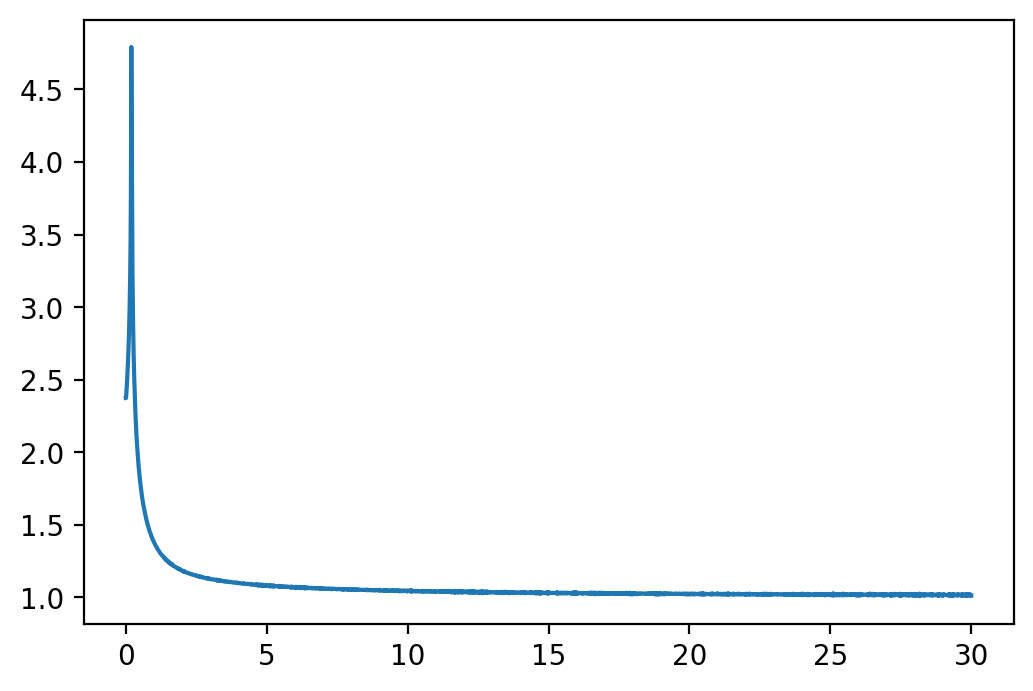

In [272]:
plt.figure(dpi=200)
plt.plot(times,Ft(0.1, times, dt_fac=10.0,**lens_params))

In [22]:
# Testing the cut Ft function 
def Ft_cut(y,cut_time, times, Ml, zl, dt_fac):
    cut_index=np.argmin(np.abs(times-cut_time))
    Ft_full=Ft(y, times, Ml, zl, dt_fac=dt_fac)
    Ft_cut=Ft_full[cut_index:-1]
    times_cut=times[cut_index:-1]
    return  times_cut,Ft_cut

Ft_cut(0.8,10,times,100,0.5,4)[1]

array([1.04693258, 1.04692018, 1.04690779, ..., 1.01525932, 1.01525932,
       1.01525932])